In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:

%matplotlib inline

In [3]:
cd /Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift/

/Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift


In [4]:
series = pd.read_csv('train/subj7_series1_data.csv', index_col=0)
print(series.head())

                 Fp1  Fp2    F7   F3   Fz   F4   F8  FC5  FC1  FC2  ...    P7  \
id                                                                  ...         
subj7_series1_0  -54 -523  2571  250 -369 -276 -764  666  -14  -56  ...   701   
subj7_series1_1  -59 -548  2582  241 -374 -288 -817  629  -27  -81  ...   703   
subj7_series1_2 -133 -550  2586  244 -407 -344 -849  632  -21 -107  ...   689   
subj7_series1_3 -176 -525  2578  319 -373 -339 -807  612   10  -61  ...   709   
subj7_series1_4 -300 -614  2539  307 -395 -408 -924  600   -9  -74  ...   677   

                  P3   Pz   P4   P8  PO9   O1   Oz   O2  PO10  
id                                                             
subj7_series1_0  265  174  183  467  335  393  100  181    91  
subj7_series1_1  293  178  169  437  319  387   85  144    50  
subj7_series1_2  288  169  137  384  293  412   70  106    -1  
subj7_series1_3  310  193  149  337  294  462  167  155    21  
subj7_series1_4  335  199  141  342  206  462  1

In [5]:
events = pd.read_csv('train/subj7_series1_events.csv', index_col=0)
print(events.head())

                 HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  \
id                                                                         
subj7_series1_0          0                0                   0        0   
subj7_series1_1          0                0                   0        0   
subj7_series1_2          0                0                   0        0   
subj7_series1_3          0                0                   0        0   
subj7_series1_4          0                0                   0        0   

                 Replace  BothReleased  
id                                      
subj7_series1_0        0             0  
subj7_series1_1        0             0  
subj7_series1_2        0             0  
subj7_series1_3        0             0  
subj7_series1_4        0             0  


In [6]:
# are there overlapping classes?
sum_events = events.sum(axis=1)

# if a row in the events data frame has sum greater than one,
# it means that more than one action is recorded at the same time
print("Number of rows where two events are happen simultaneously:", len(sum_events[sum_events == 2]))
print("Number of rows where three events are happen simultaneously:", len(sum_events[sum_events == 3]))
print("Number of rows where four events are happen simultaneously:", len(sum_events[sum_events == 4]))

Number of rows where two events are happen simultaneously: 3249
Number of rows where three events are happen simultaneously: 0
Number of rows where four events are happen simultaneously: 0


In [7]:
# let's convert the events data frame to a single vector of events
# the encoding is the following
# 0: no action occurrs
# 1: HandStart
# 2: FirstDigitTouch
# 3: BothStartLoadPhase
# 4: LiftOff
# 5: Replace
# 6: BothReleased
# NOTE: What do we do with the overlapping classes?
# For now, I'm just going to take the first label
# For example, if 'BothStartLoadPhase' and 'Replace' are both 1 in one row,
# the row looks like [0, 0, 0, 1, 1, 0], but I will say that the label for
# the row is just 3 (BothStartLoadPhase)
num_samples = len(events)
labels = np.zeros(num_samples) # start with an array of all zeros
non_zero = np.any(events.values > 0, axis=1) # get a Boolean array indicating which rows have at least one 1
# the class label is the one plus the index of the first occurrence of 1
labels[non_zero] = (np.argmax(events.values, axis=1)[non_zero] + 1) 

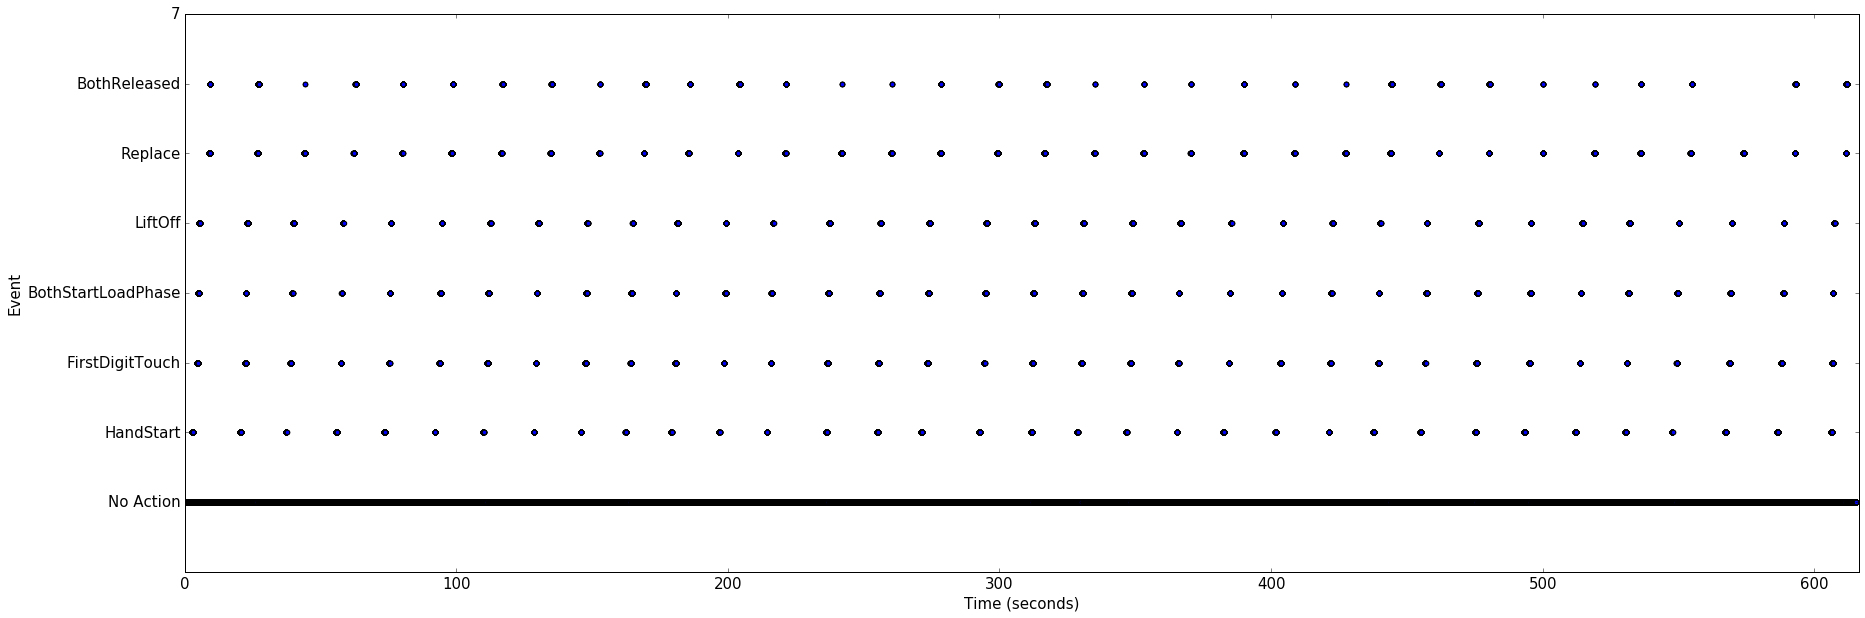

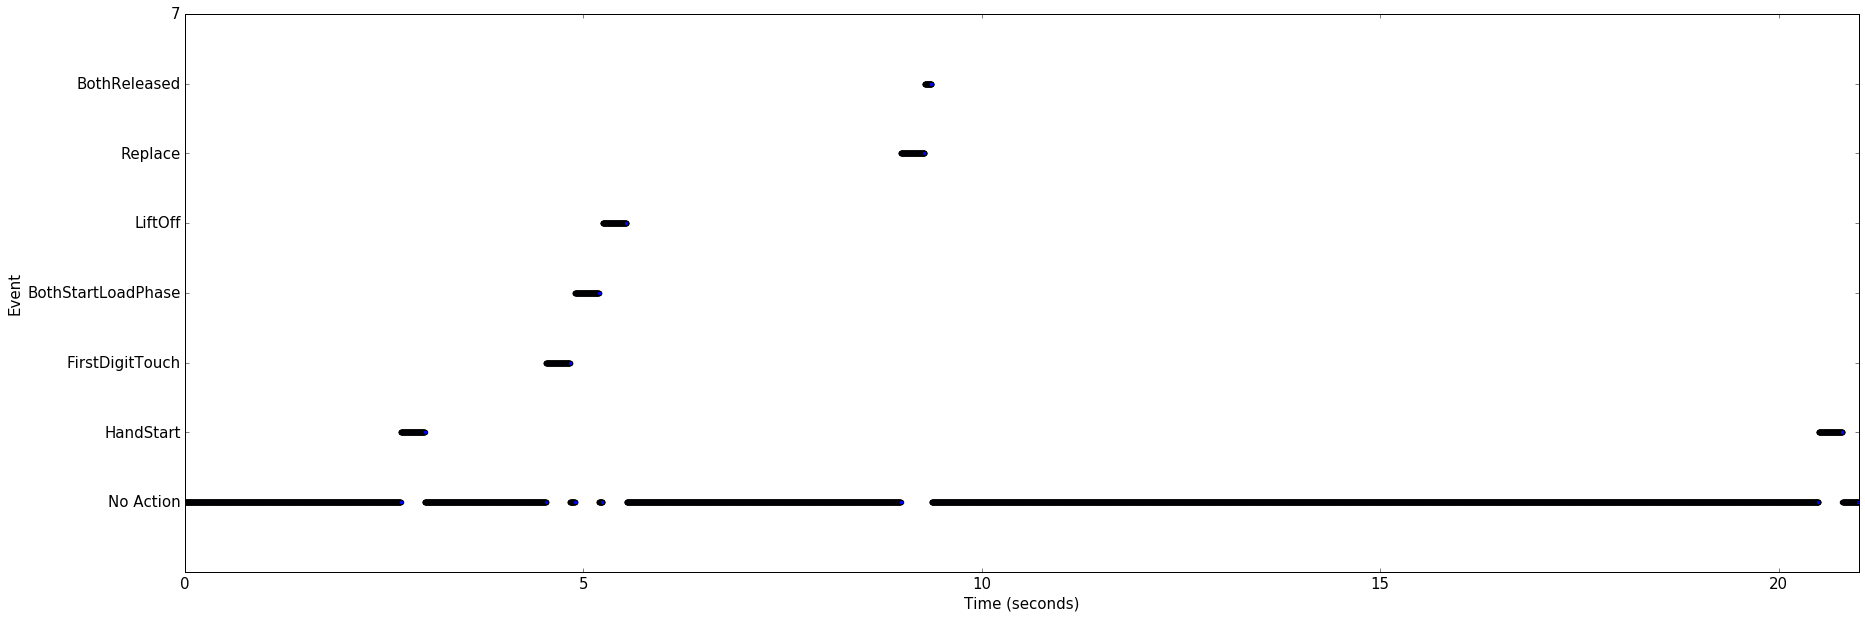

In [8]:
# OK. Let's plot it
sampling_rate = 500.
# prepare the x-axis. We divide by the sampling rate to get time in seconds
x_axis = np.arange(num_samples) / sampling_rate

# make font bigger
matplotlib.rcParams.update({'font.size': 15})

# full time series
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis, labels)
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.xlim(0, x_axis[-1] + 1)
locations = range(8)
names = ["No Action", "HandStart", "FirstDigitTouch", "BothStartLoadPhase", "LiftOff", "Replace", "BothReleased", "7"]
plt.yticks(locations, names)
plt.show()
plt.close()

# the first 21 seconds
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis[:10500], labels[:10500])
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.yticks(locations, names)
plt.xlim(0, 21)
plt.show()
plt.close()


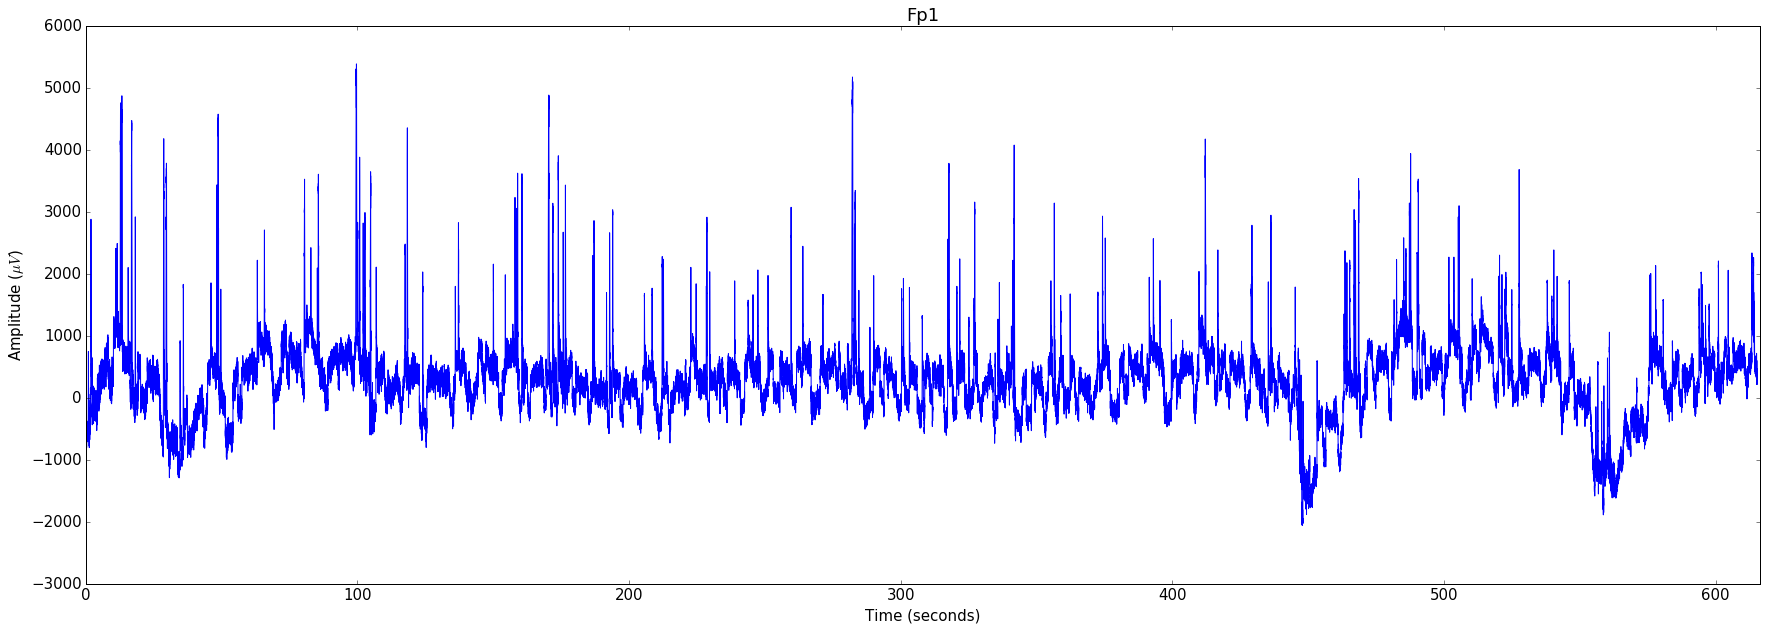

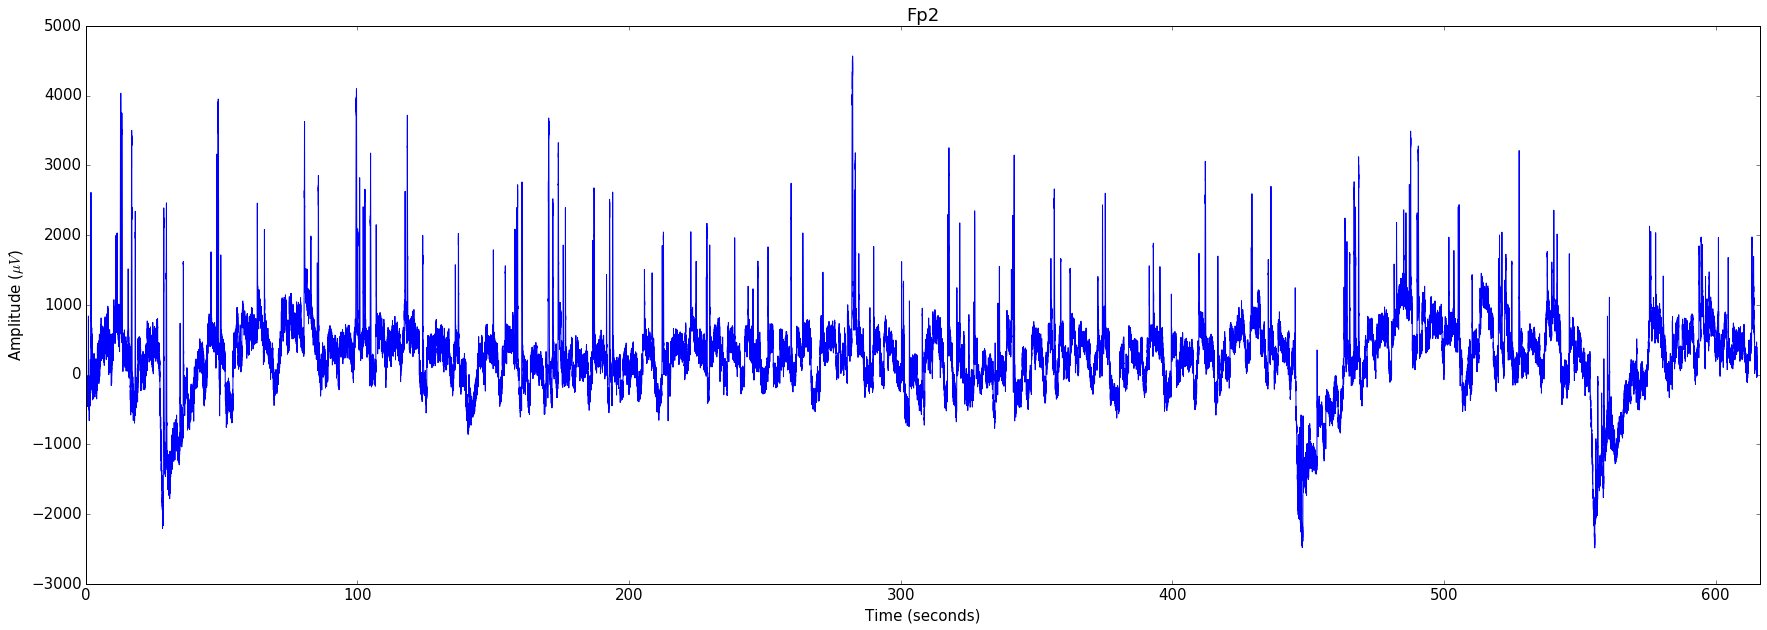

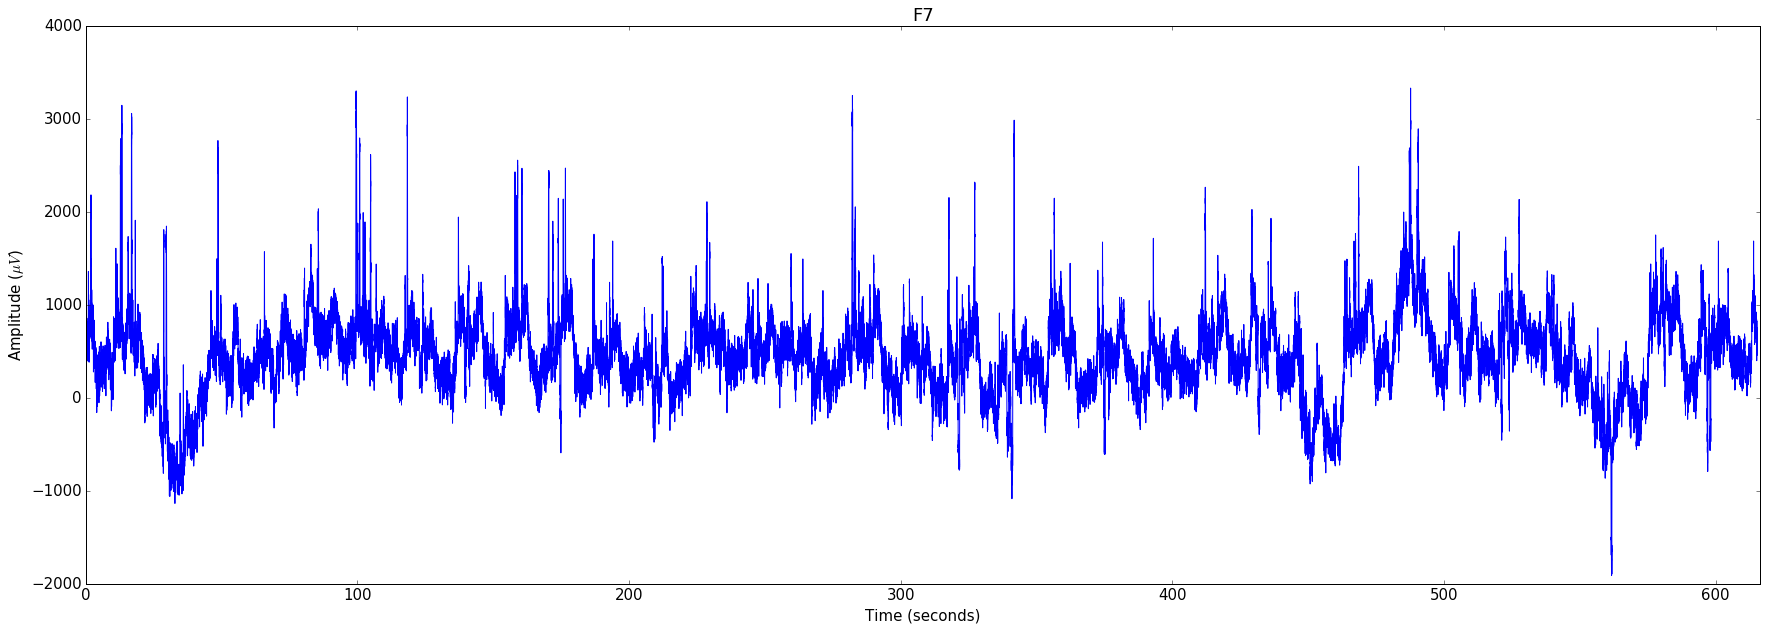

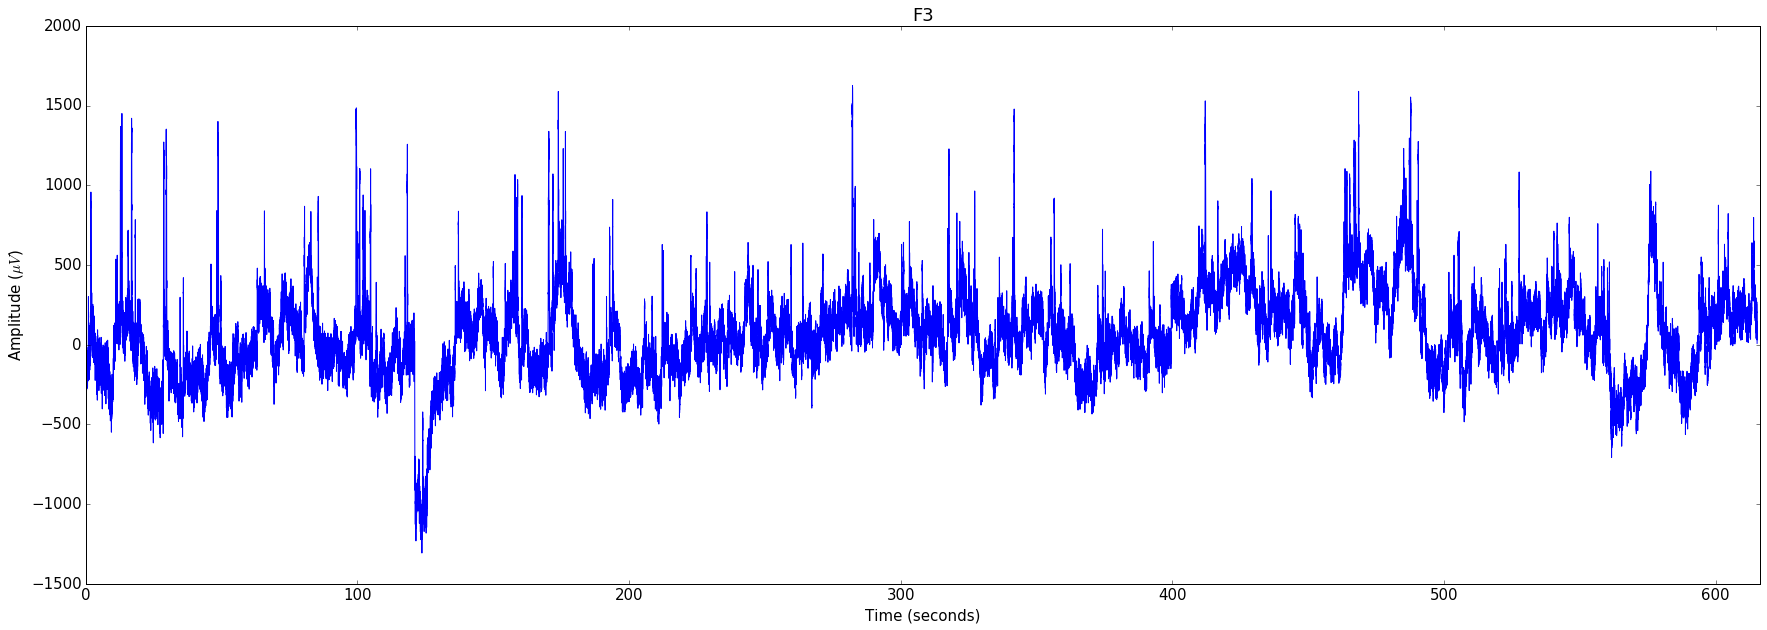

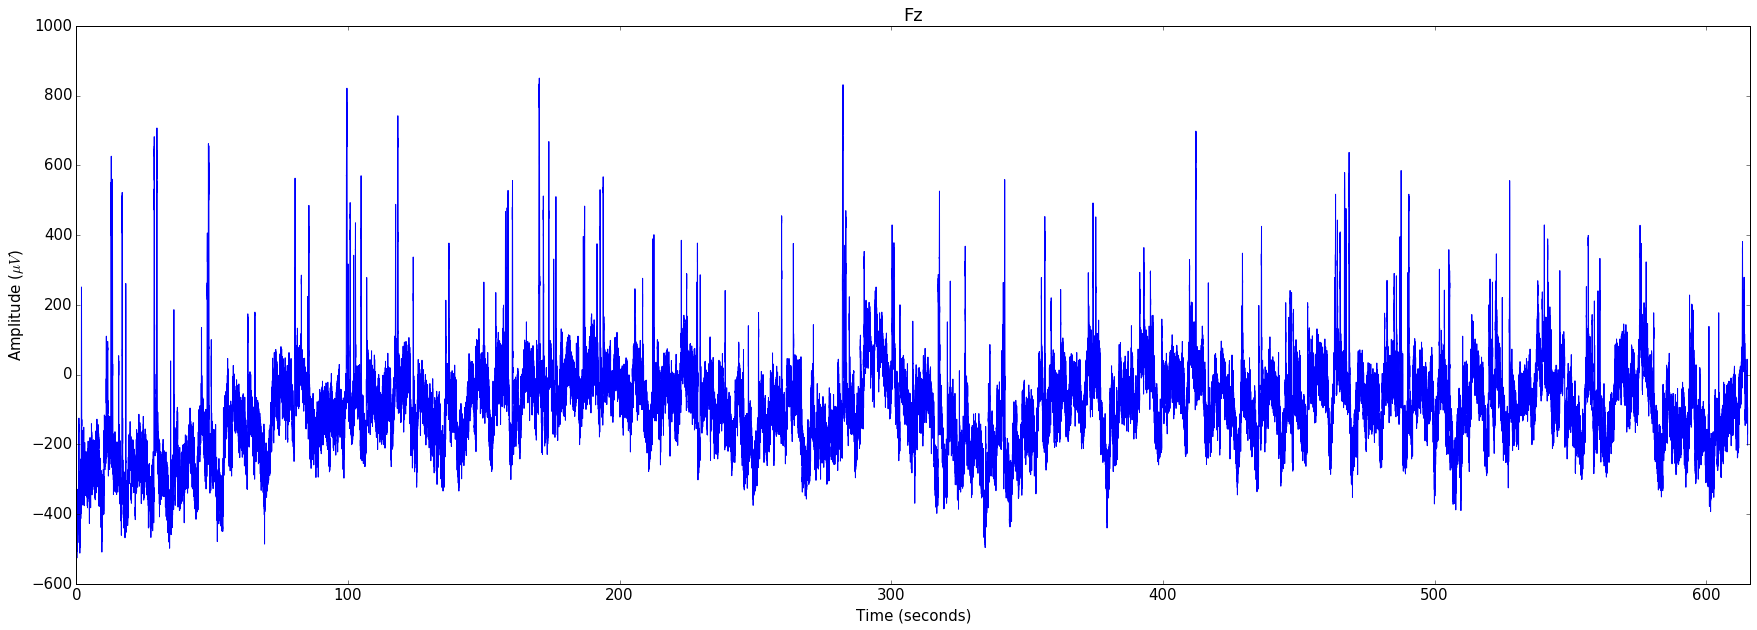

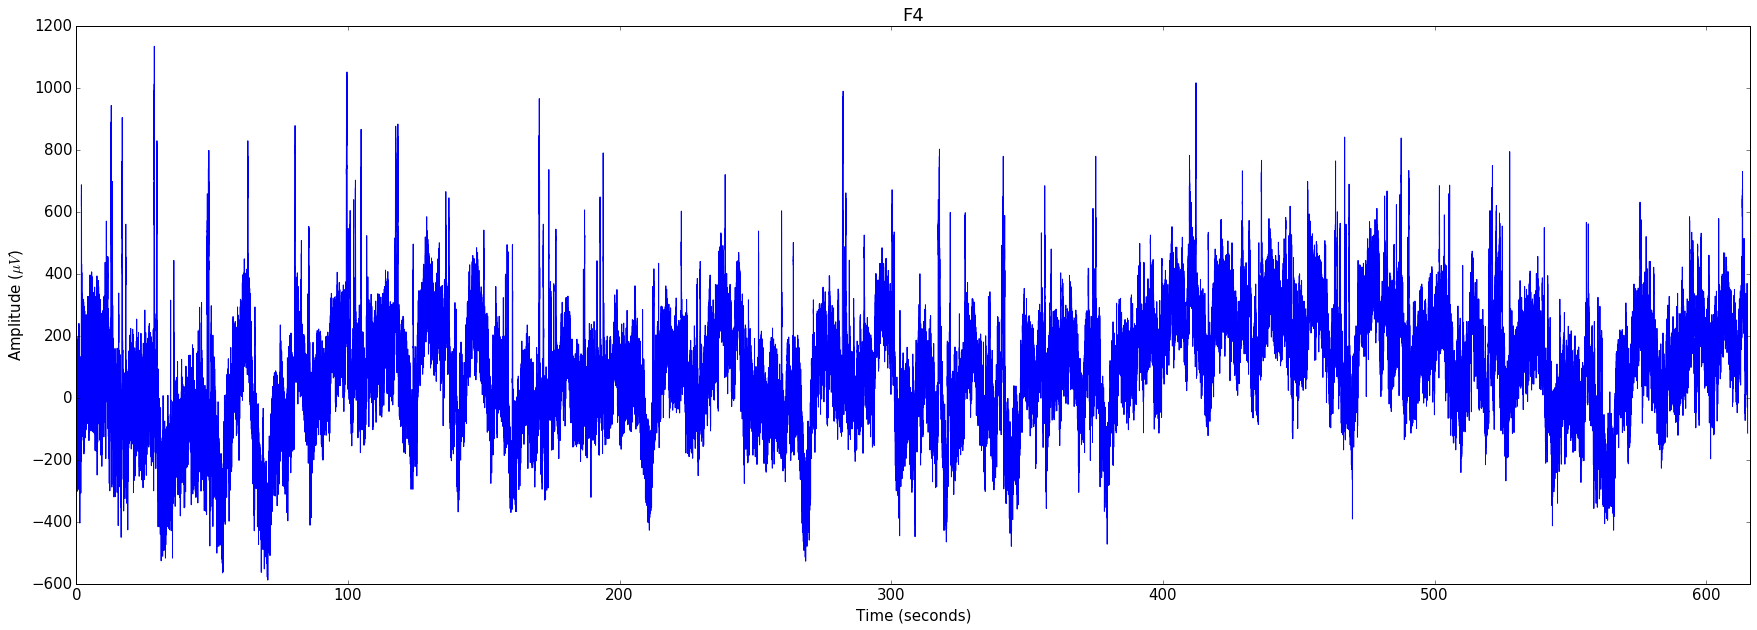

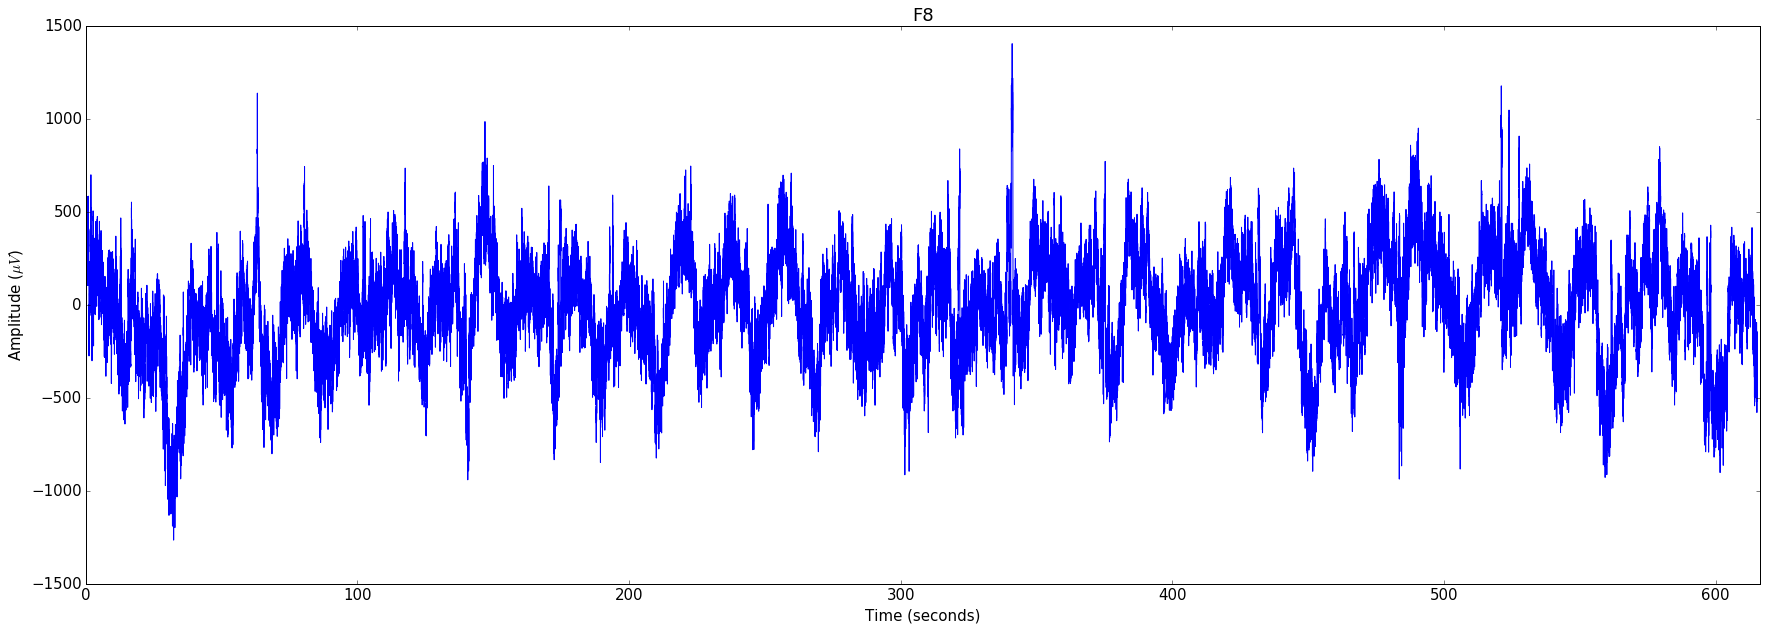

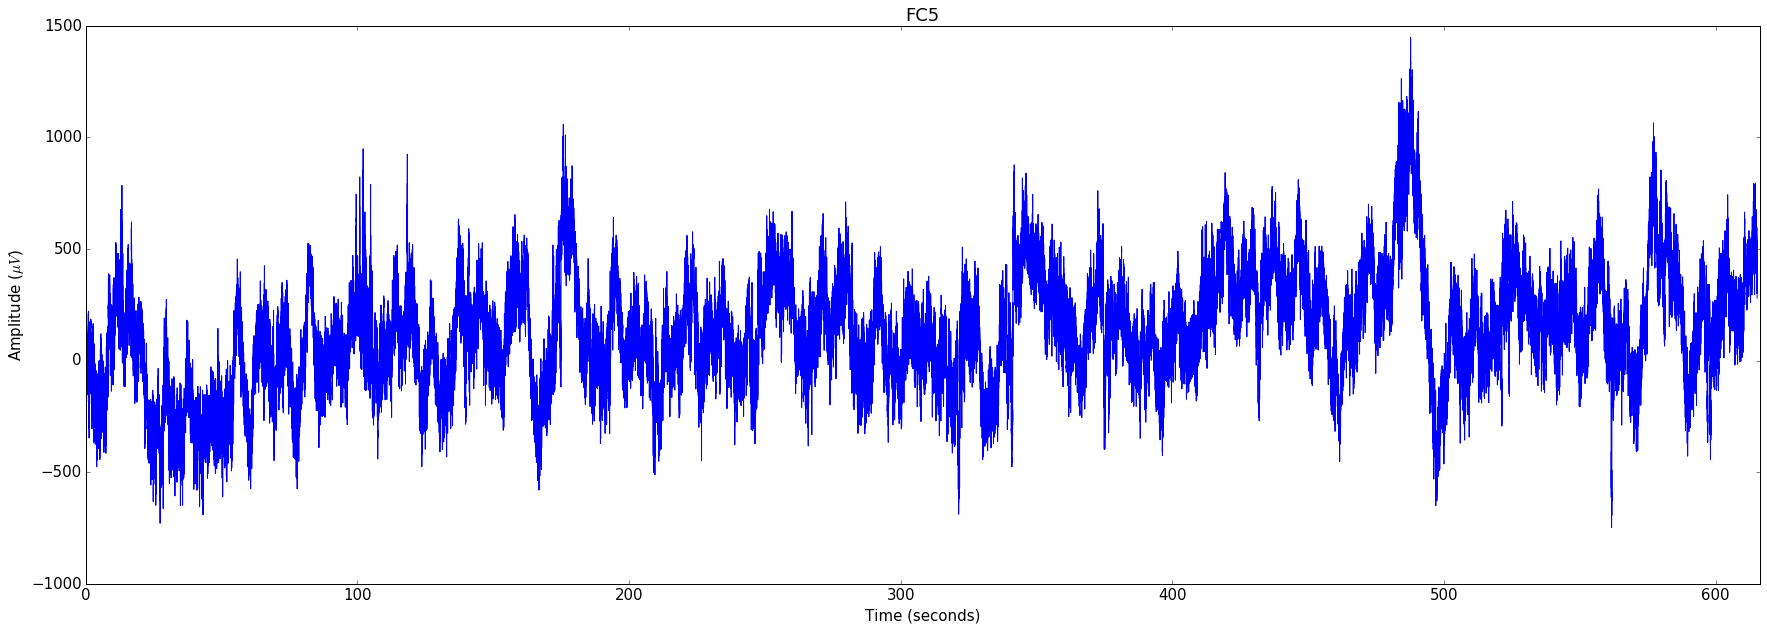

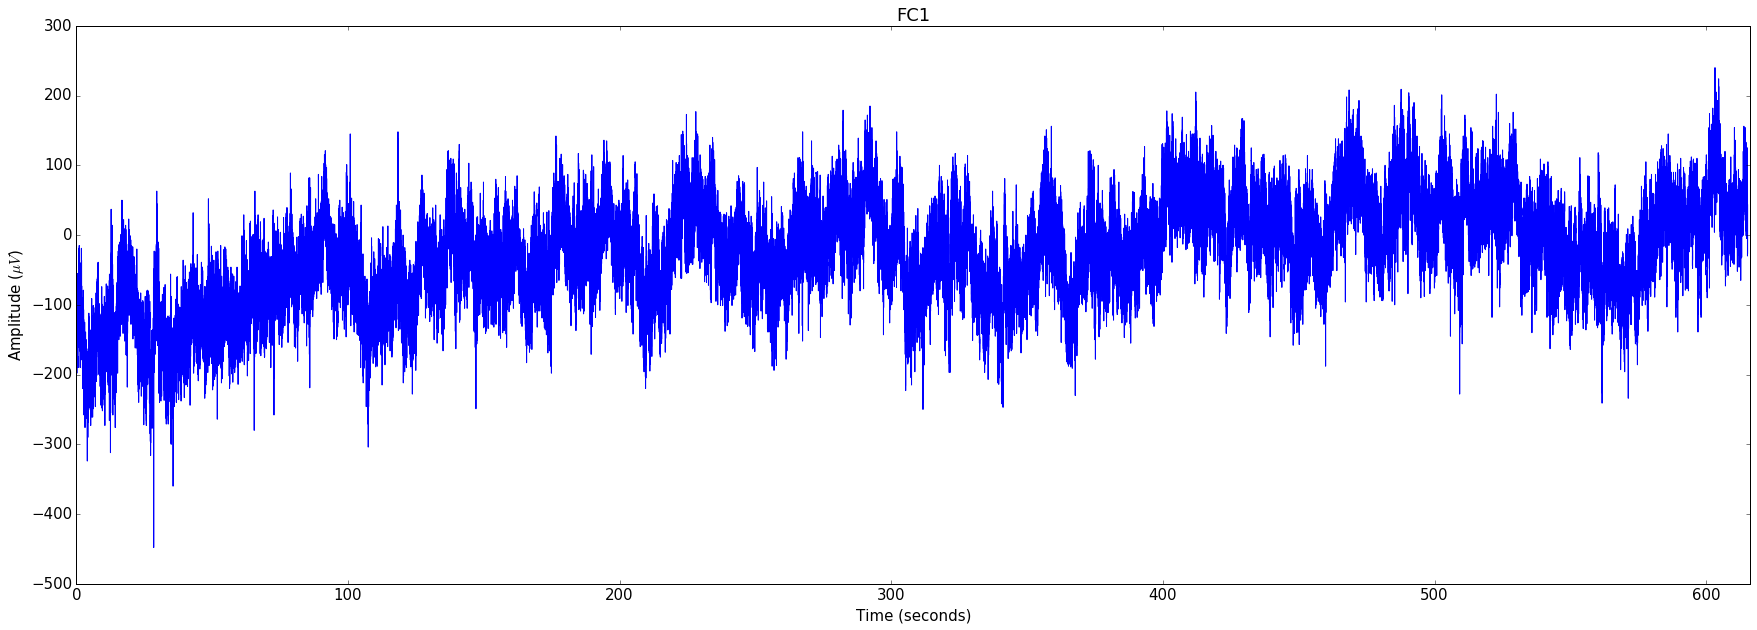

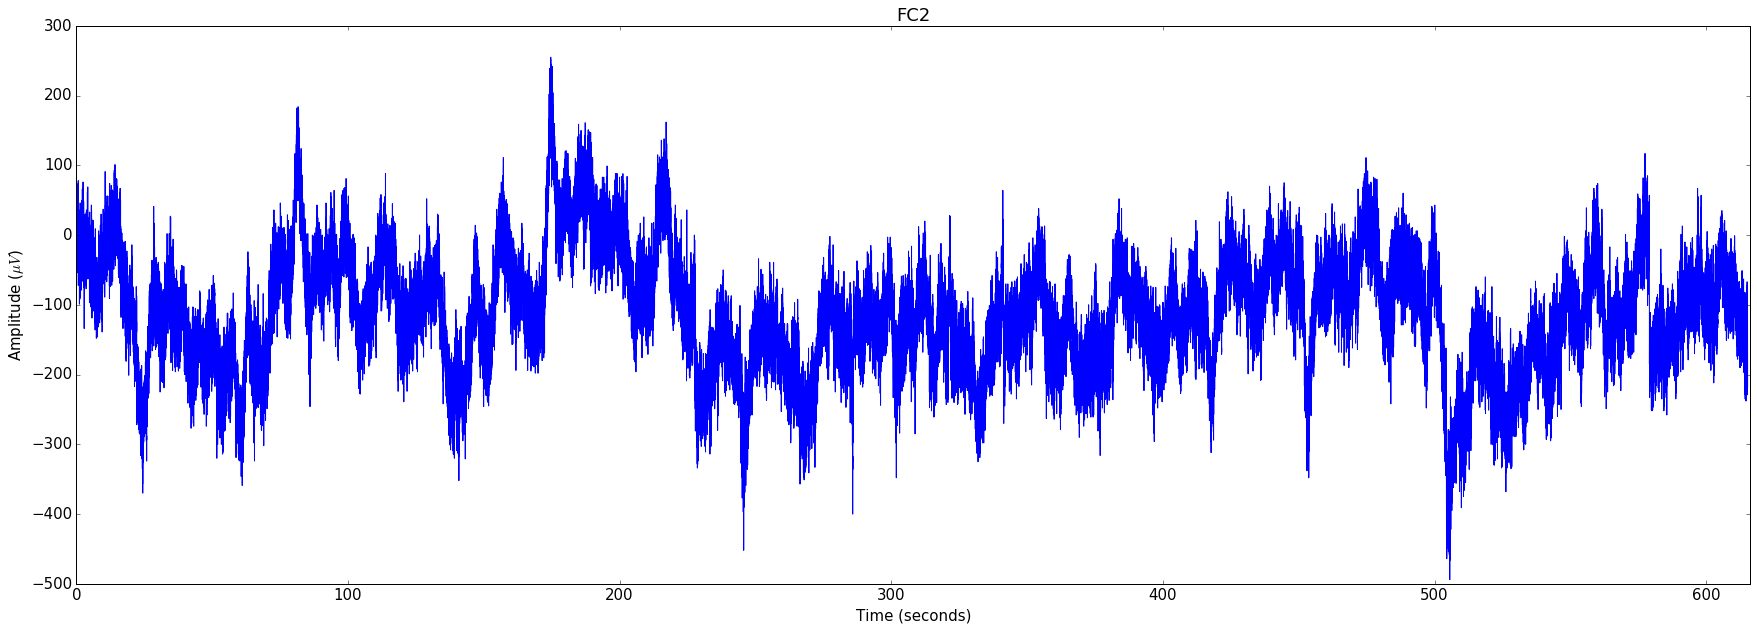

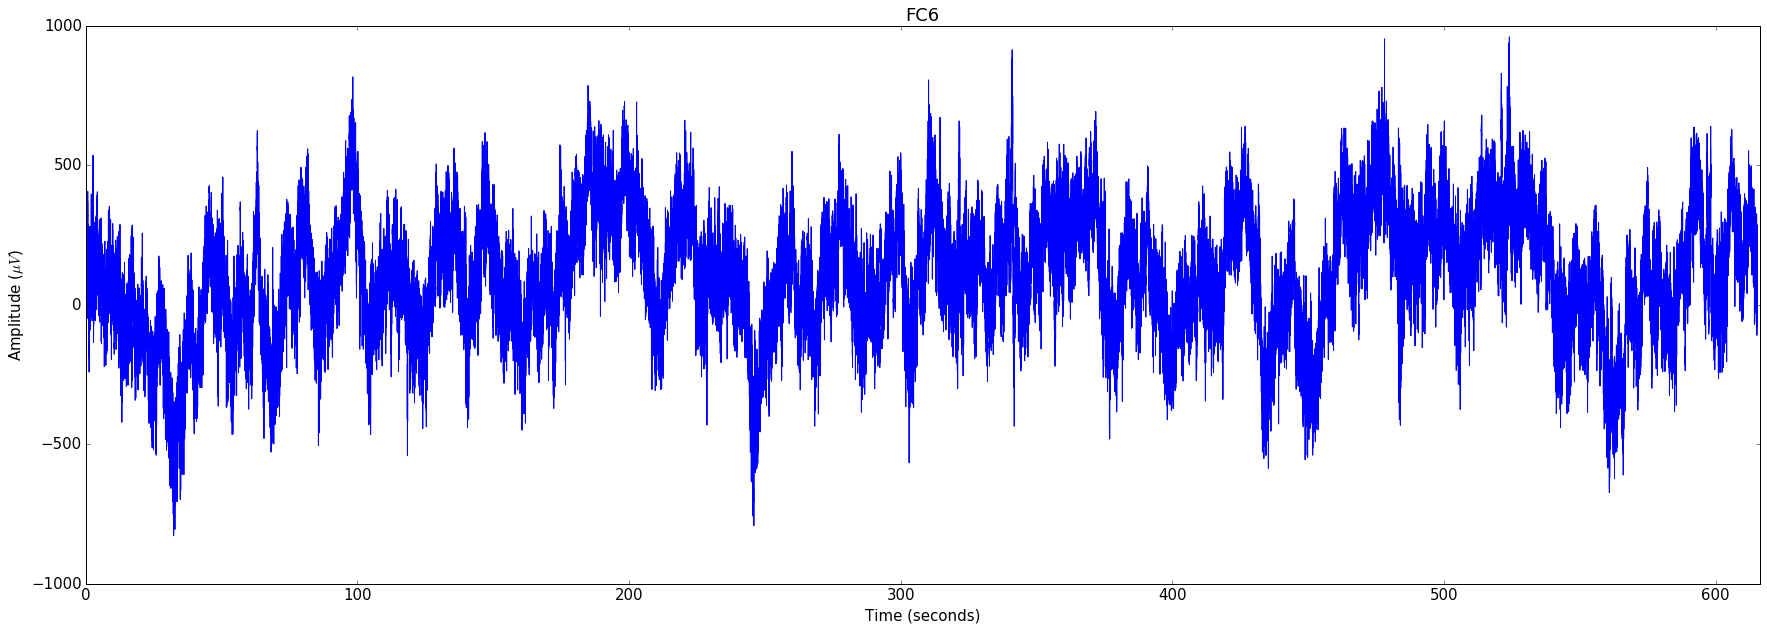

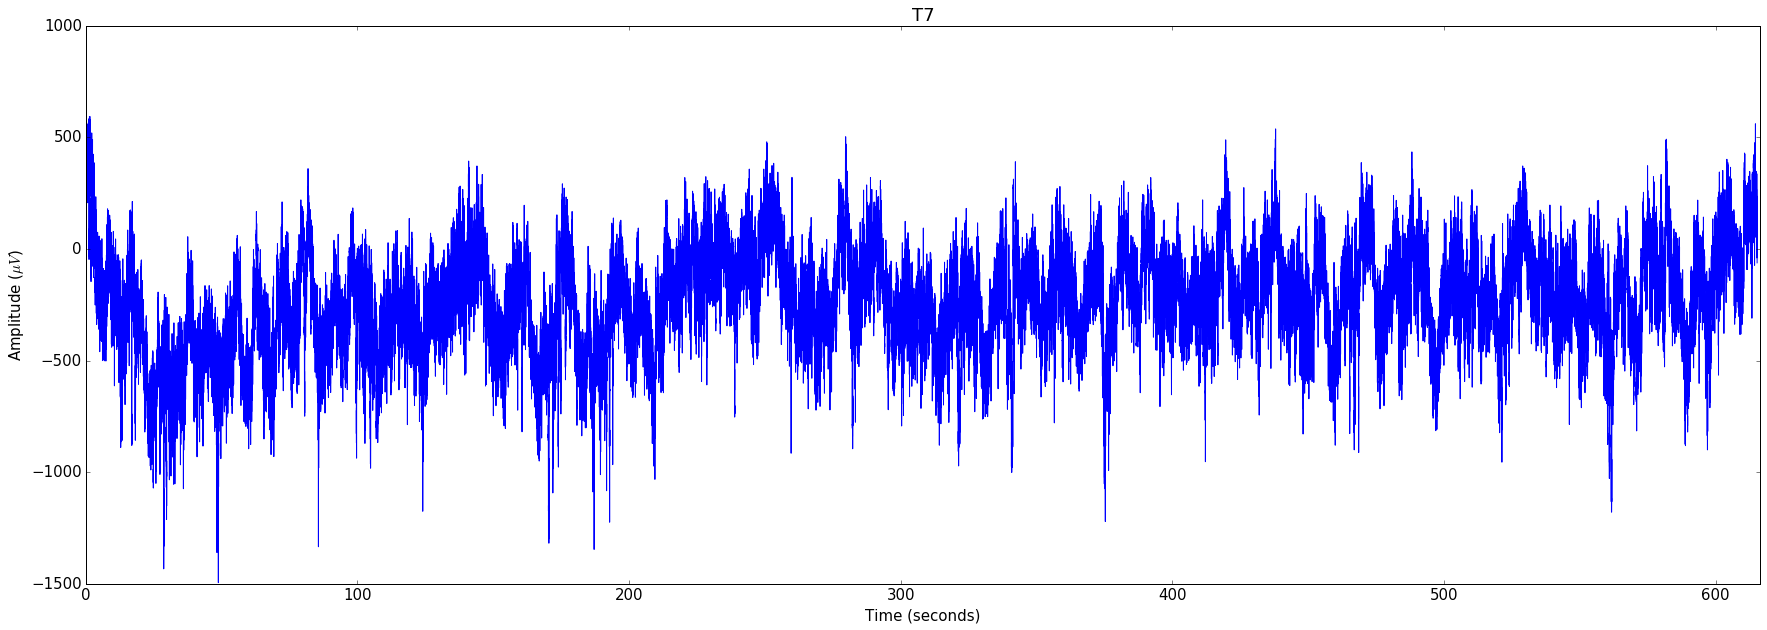

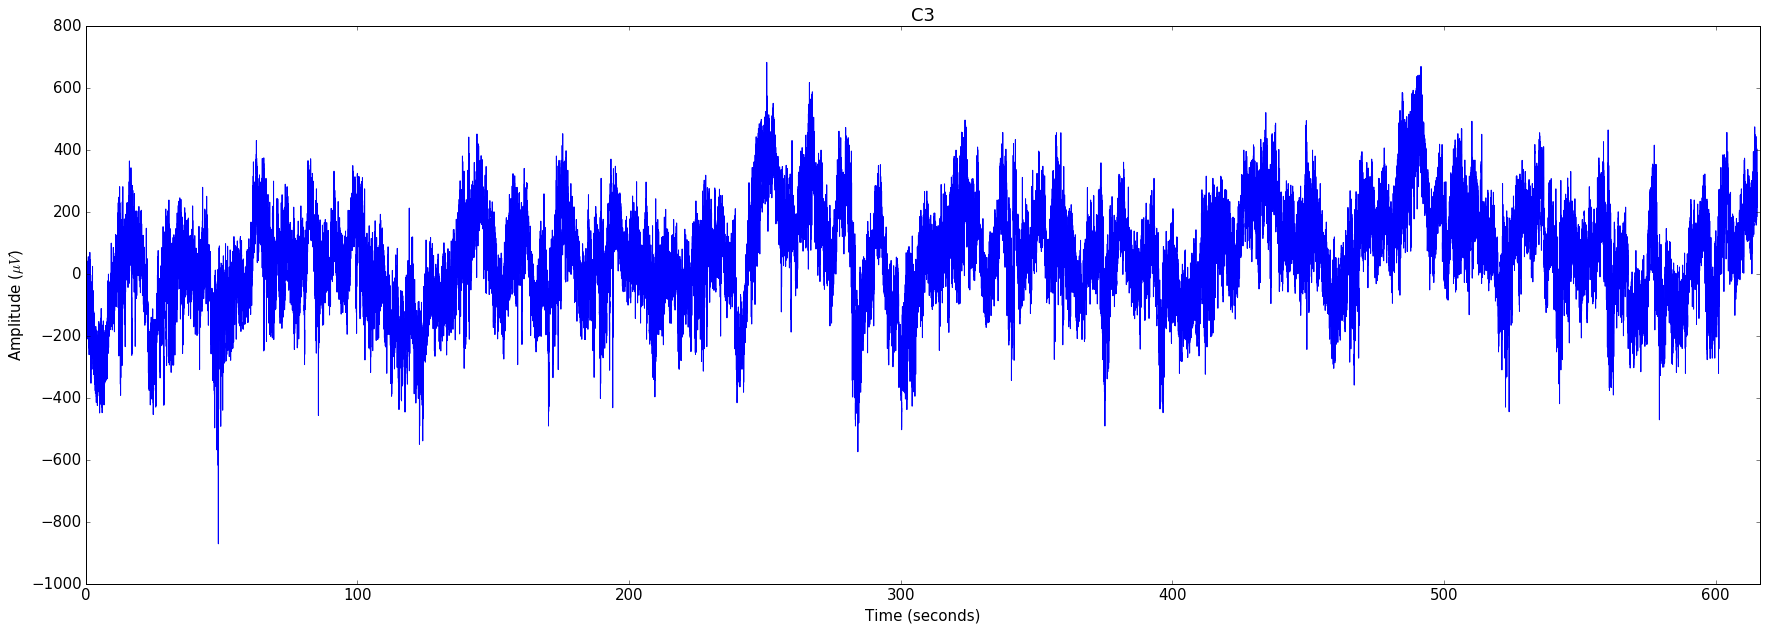

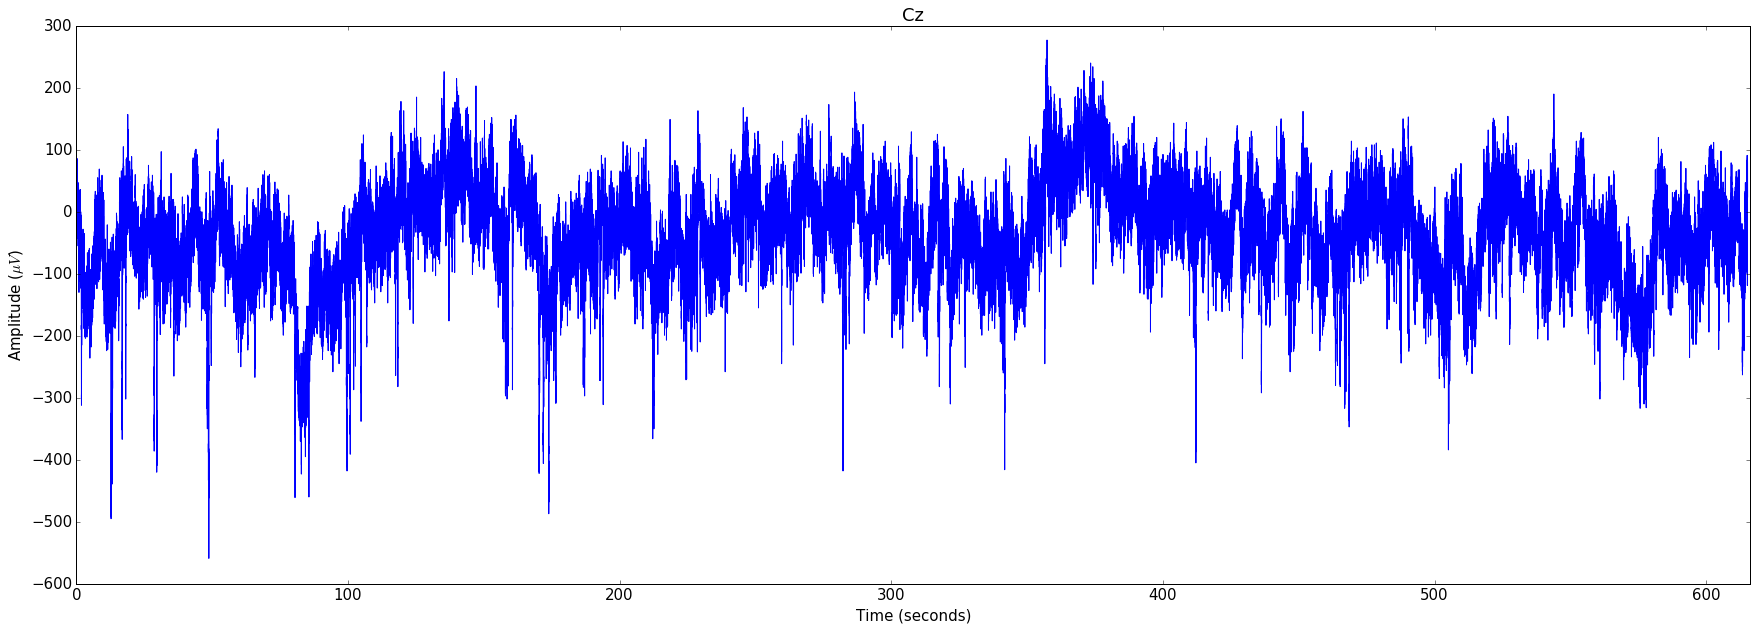

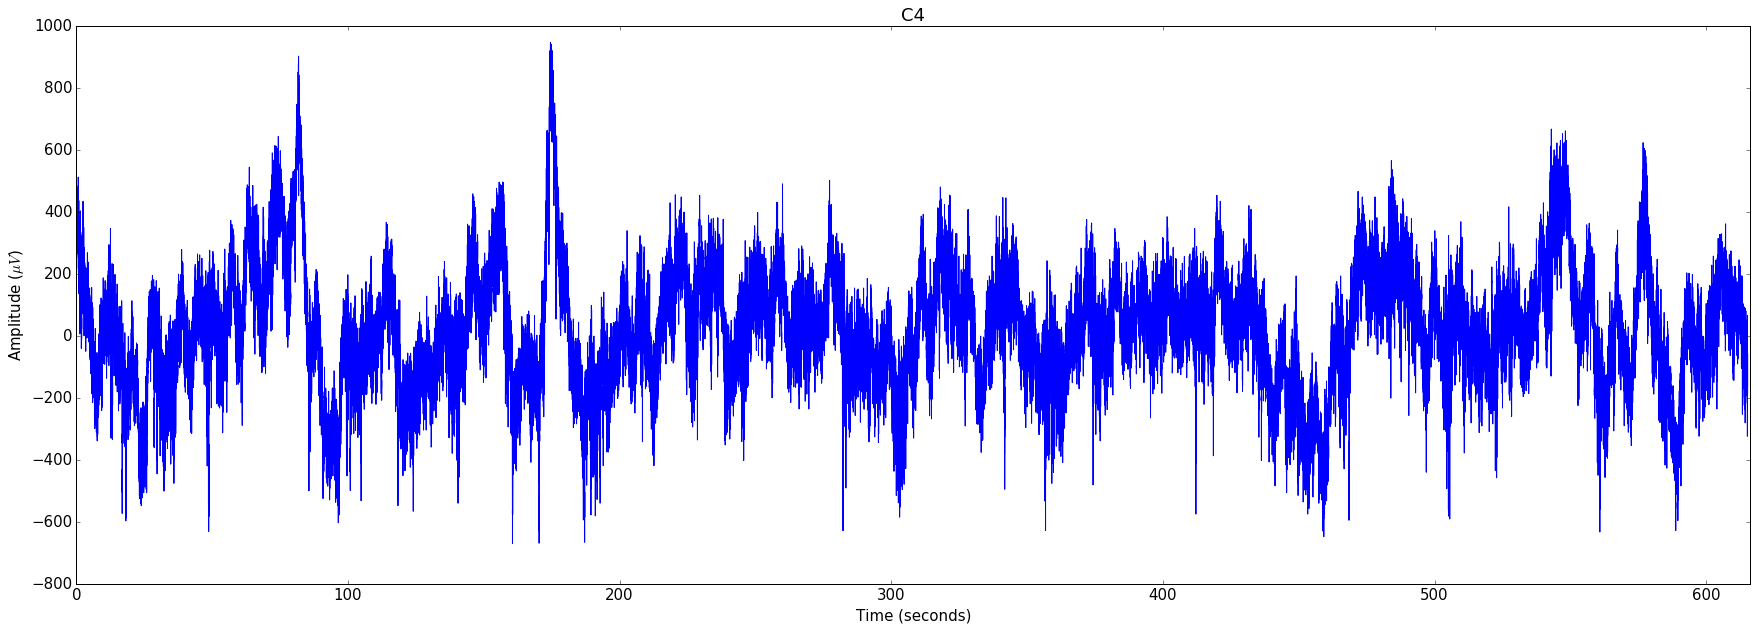

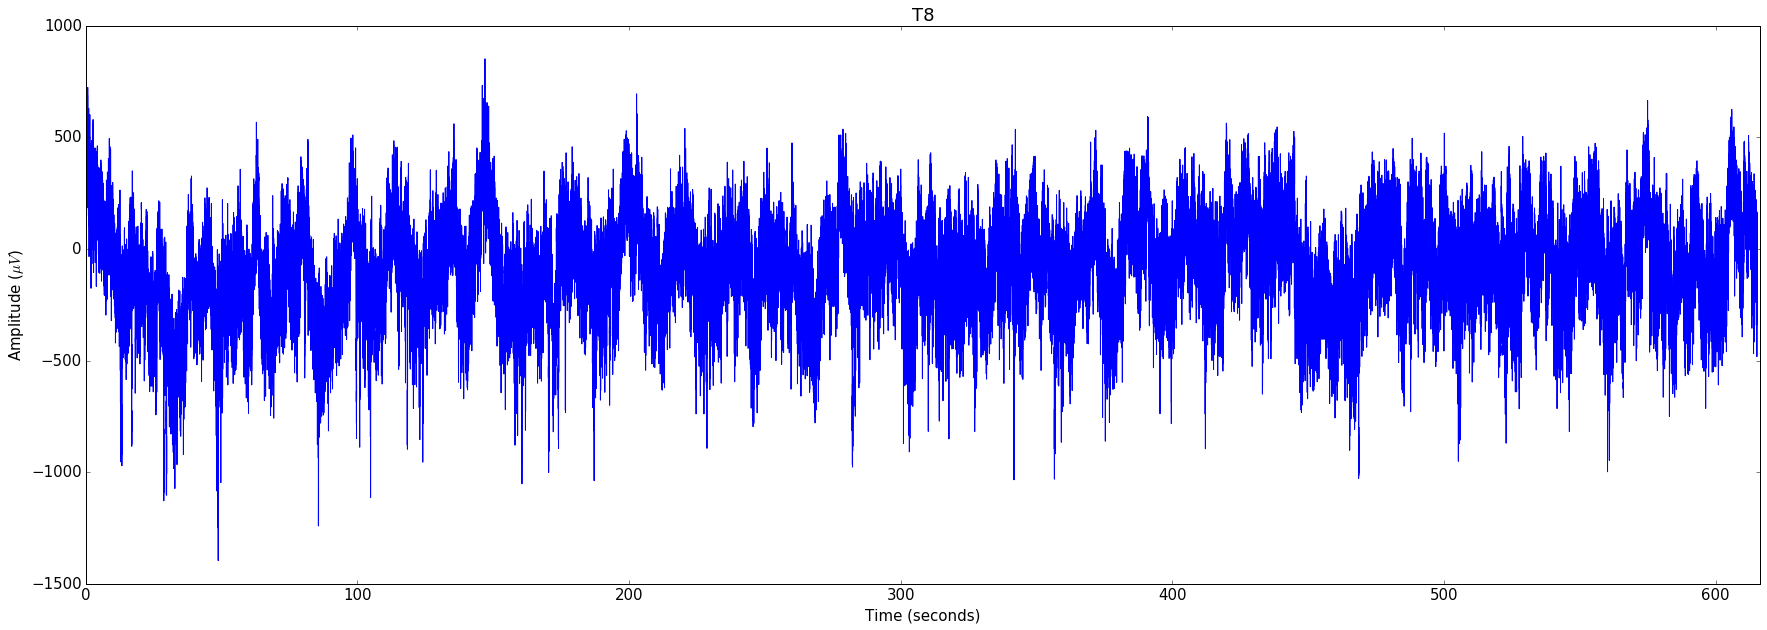

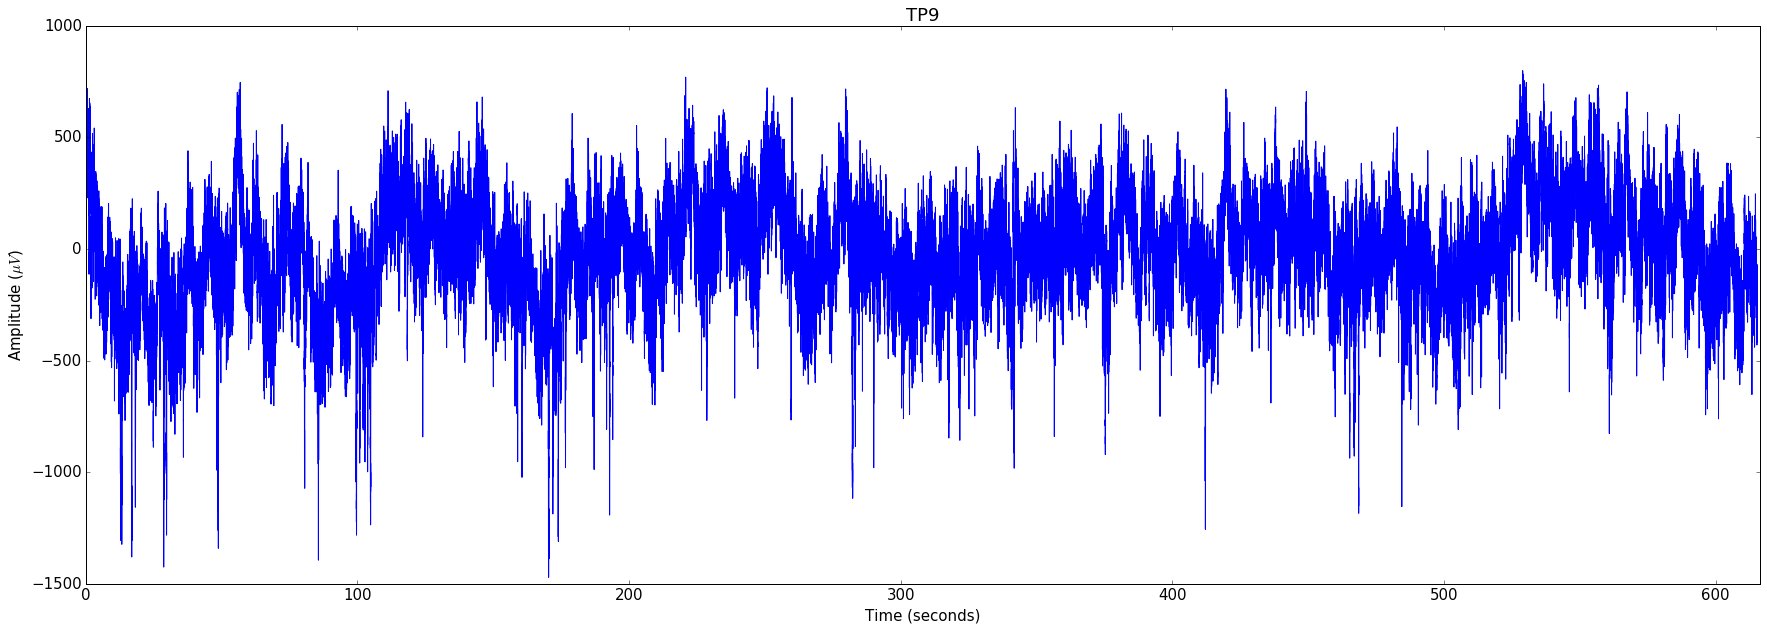

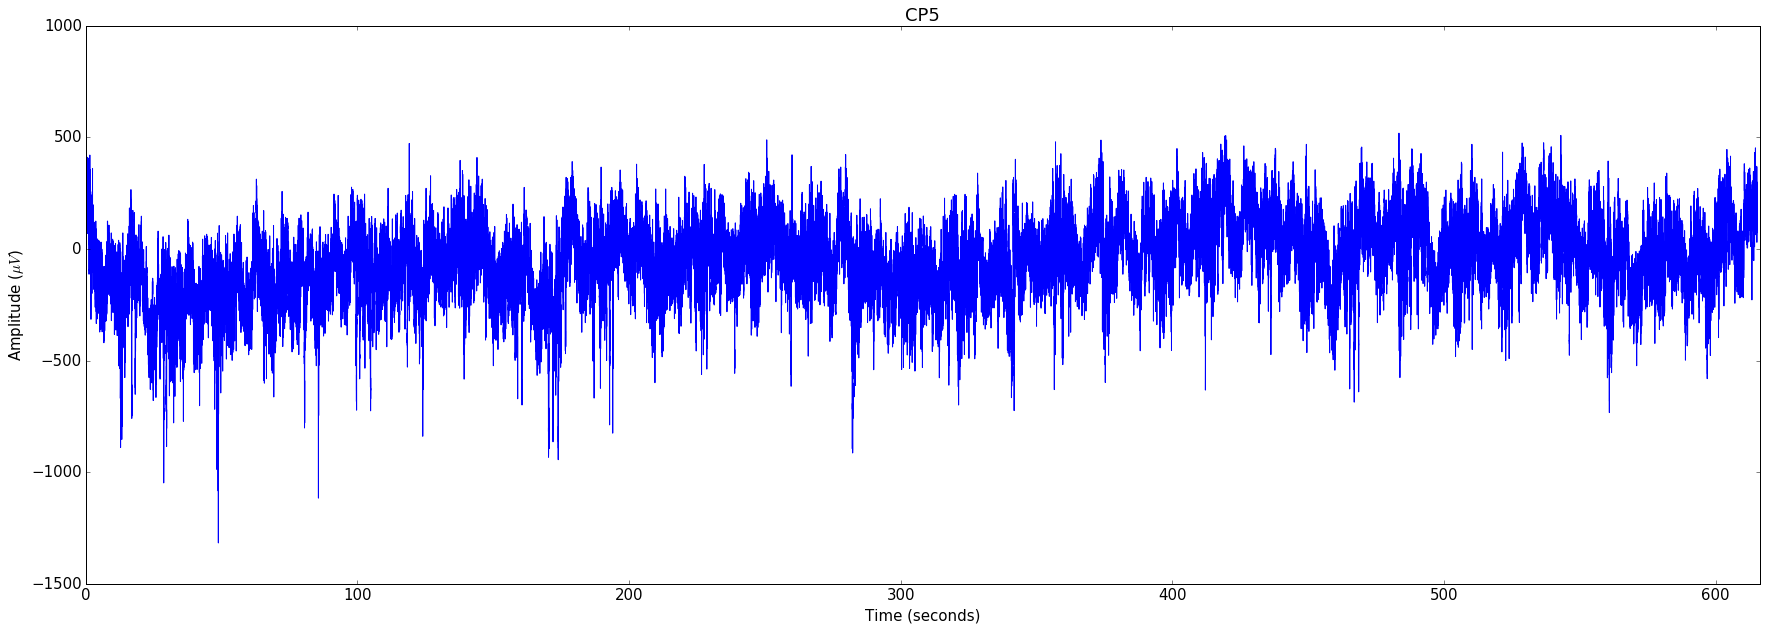

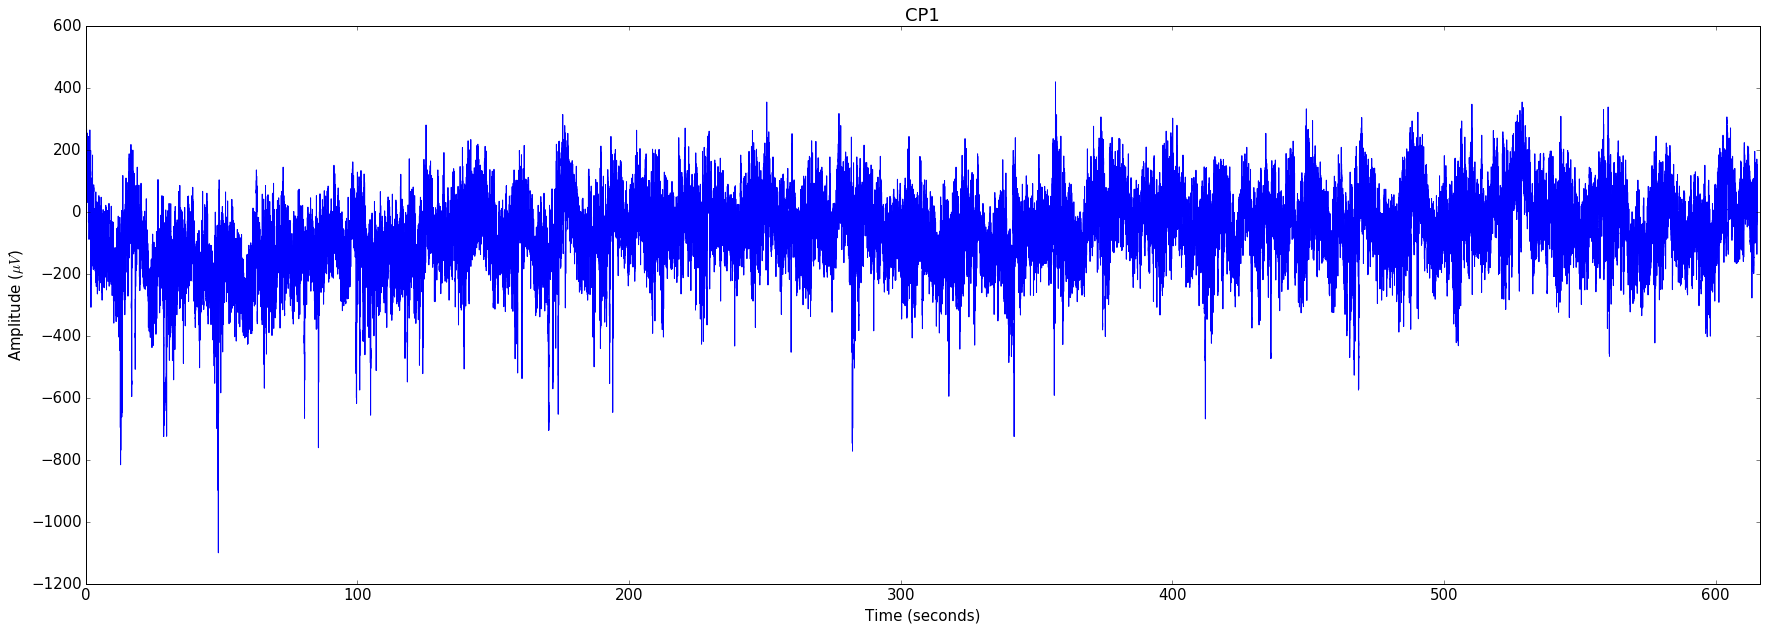

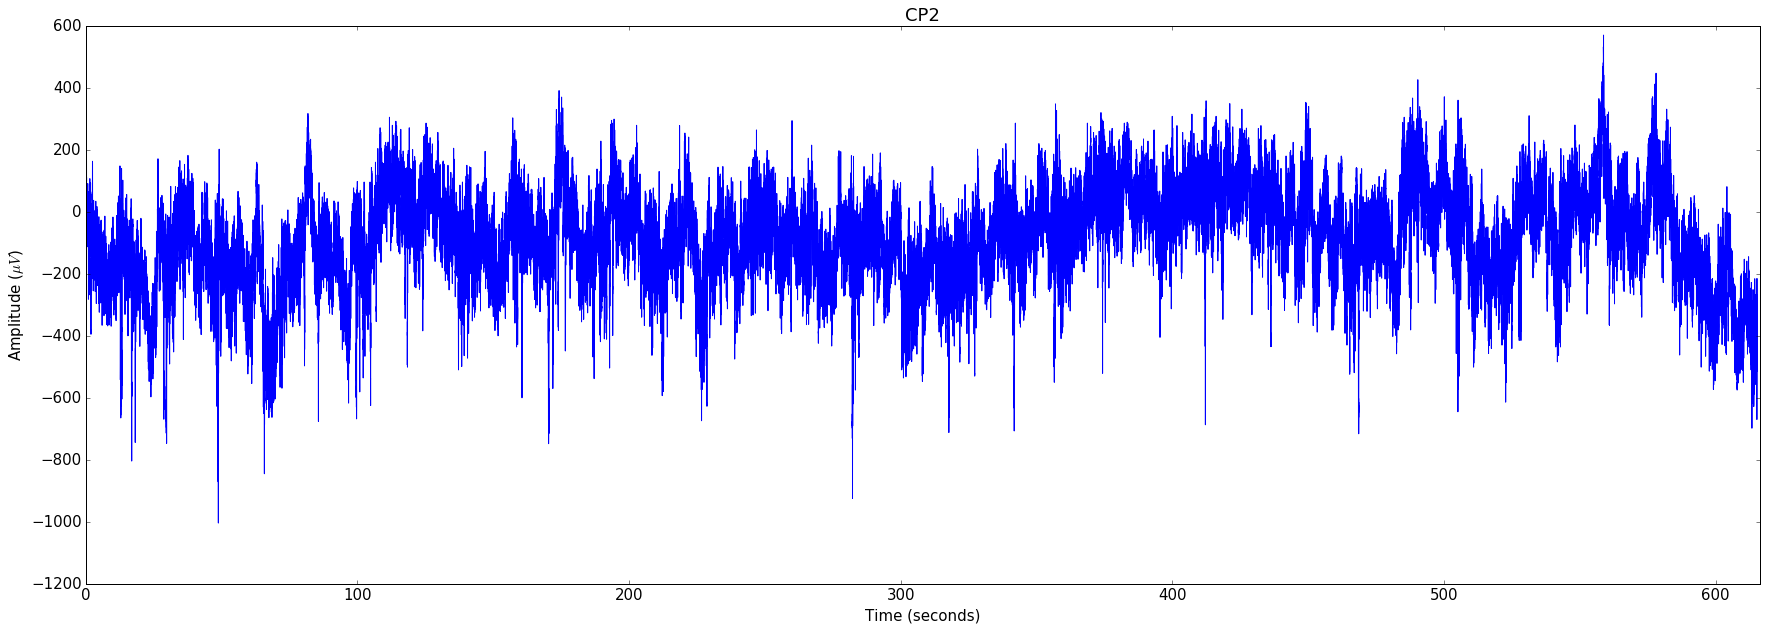

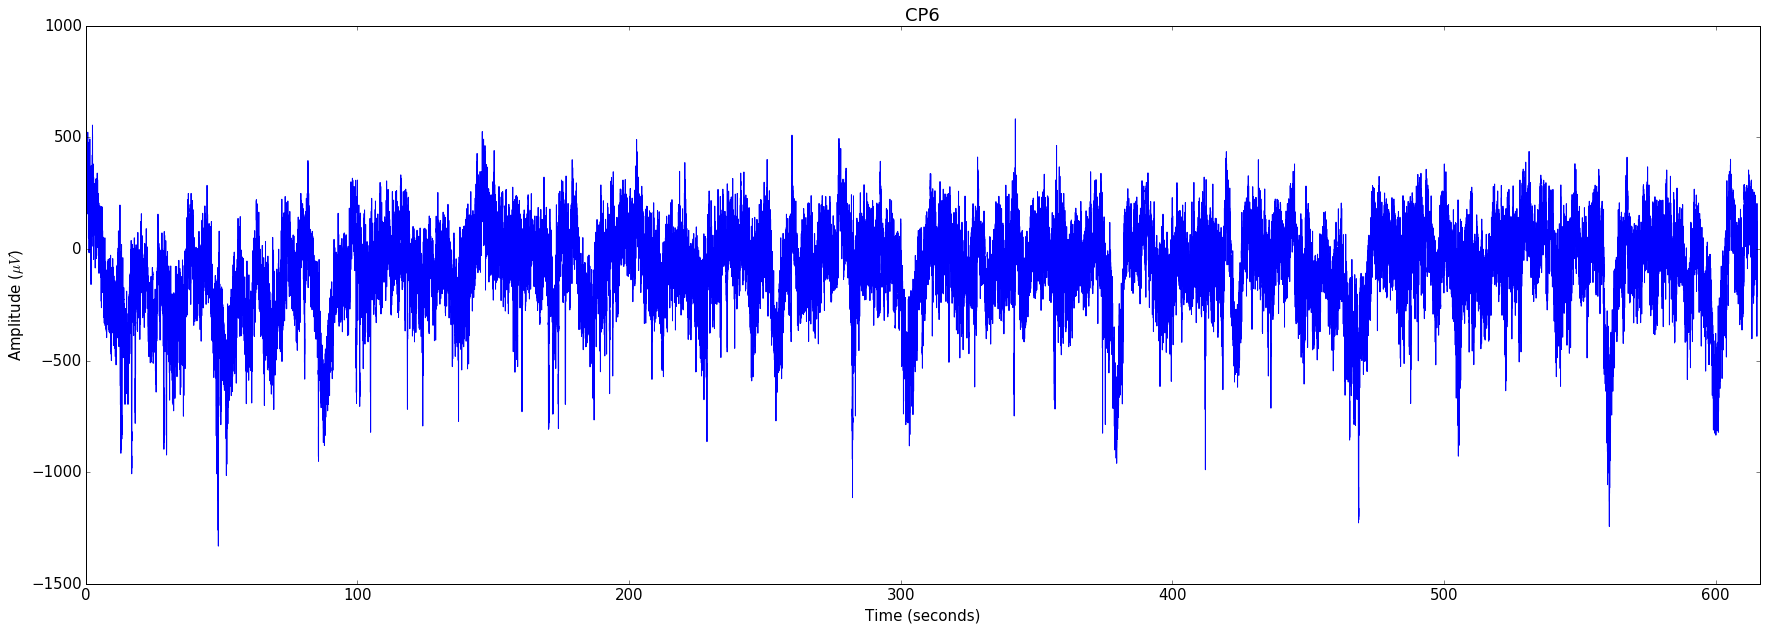

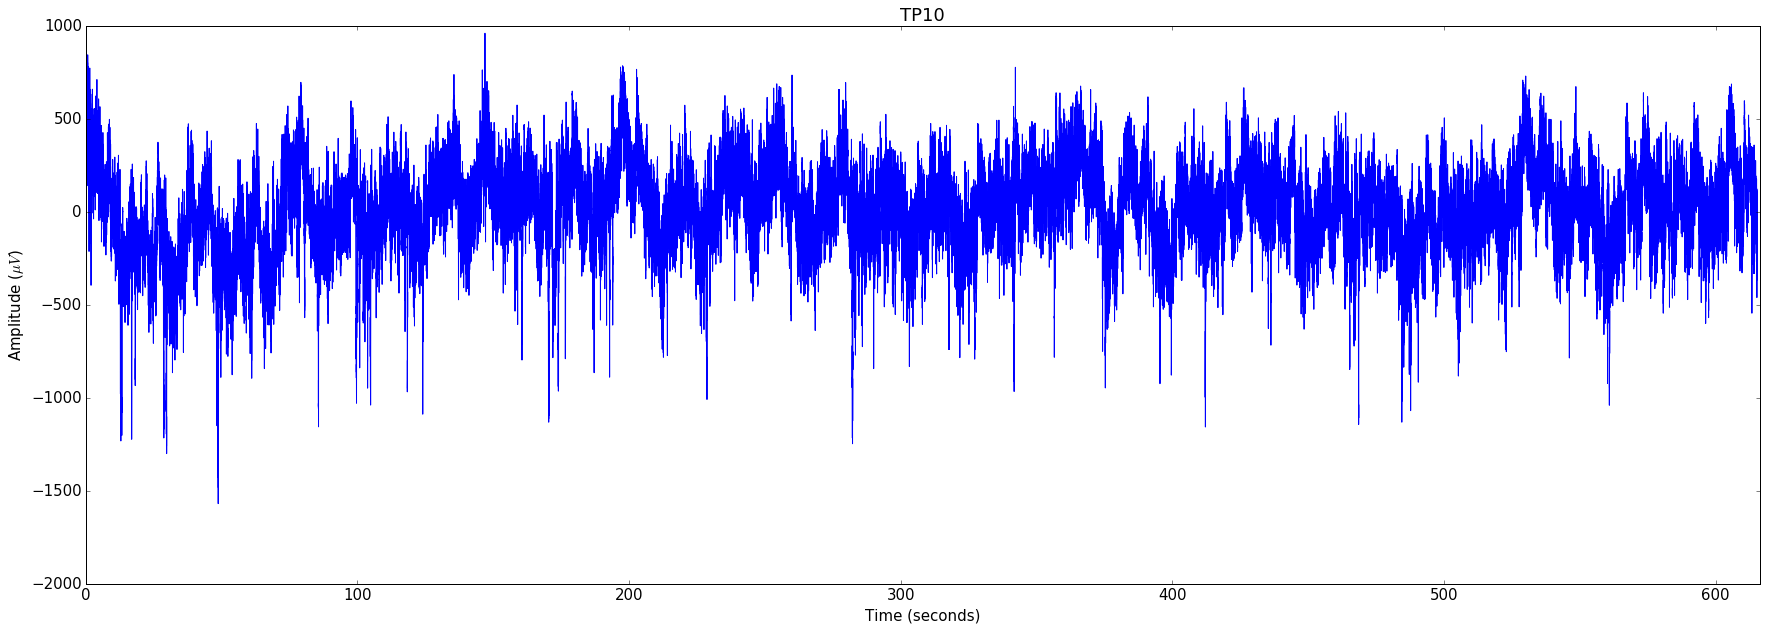

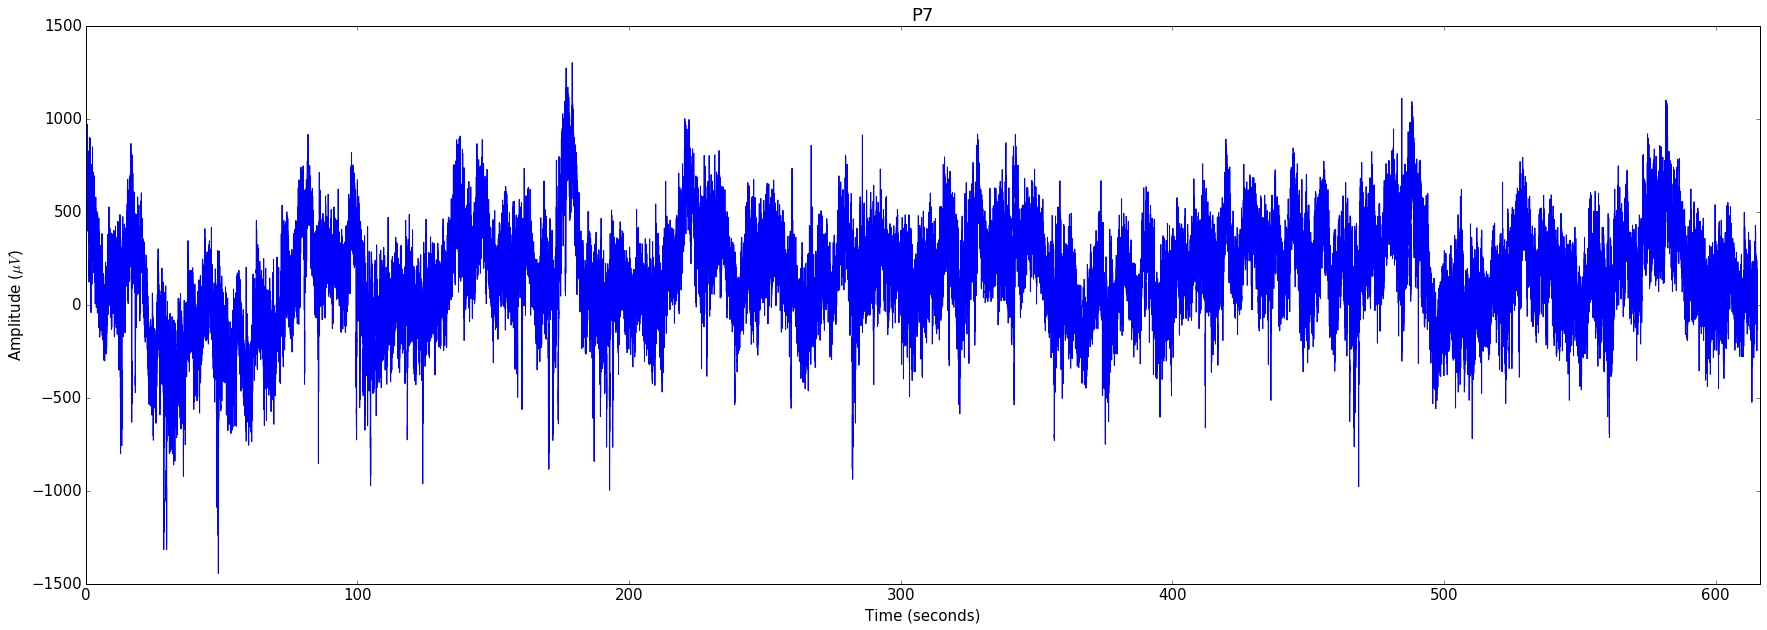

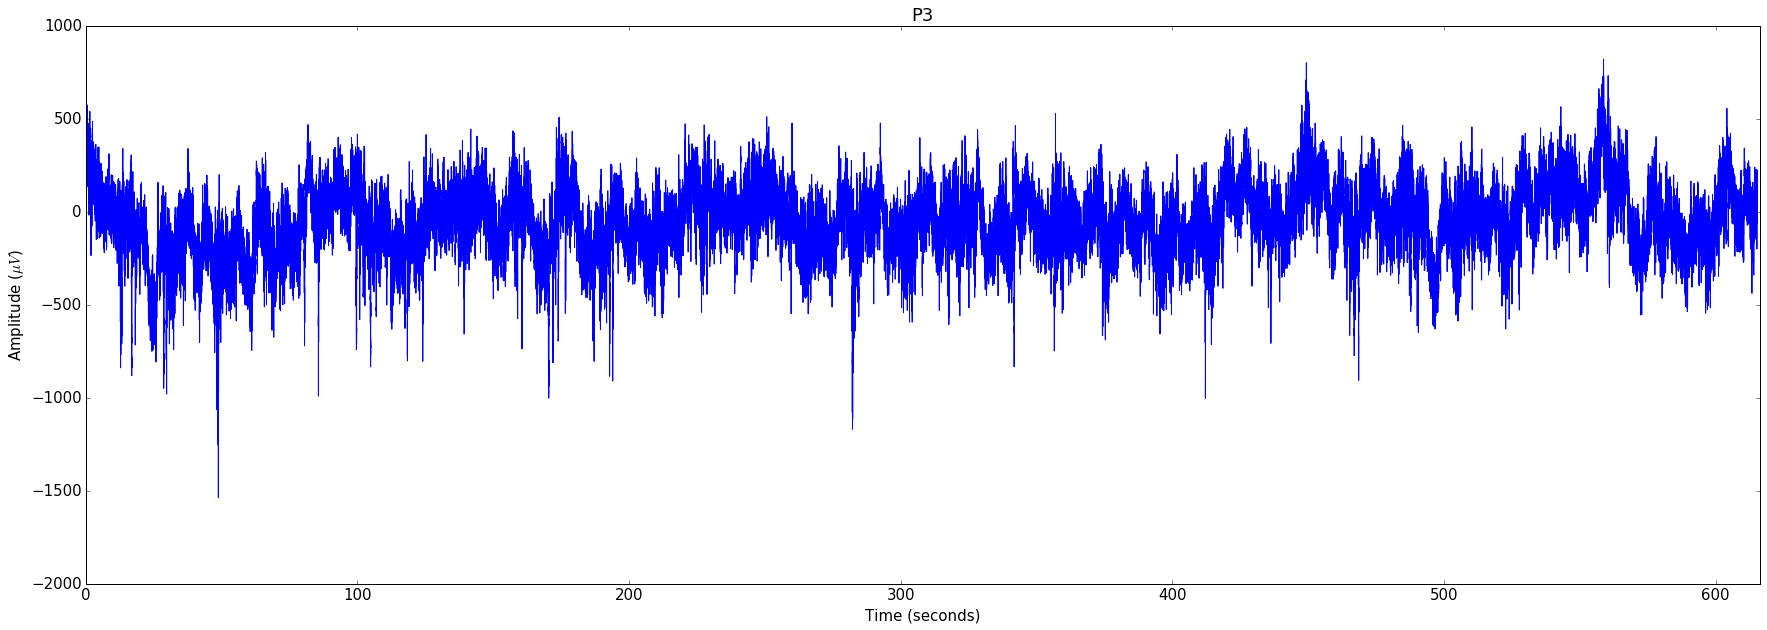

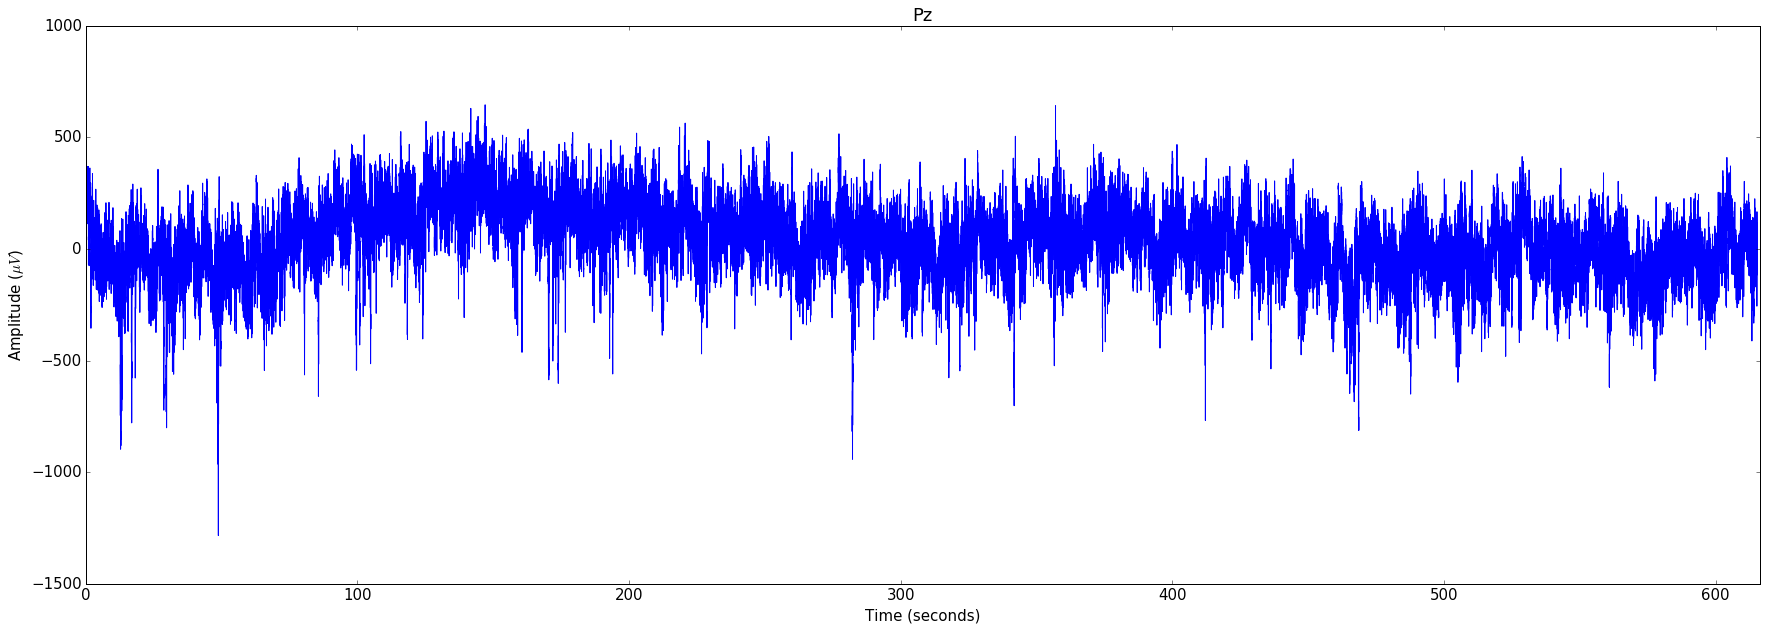

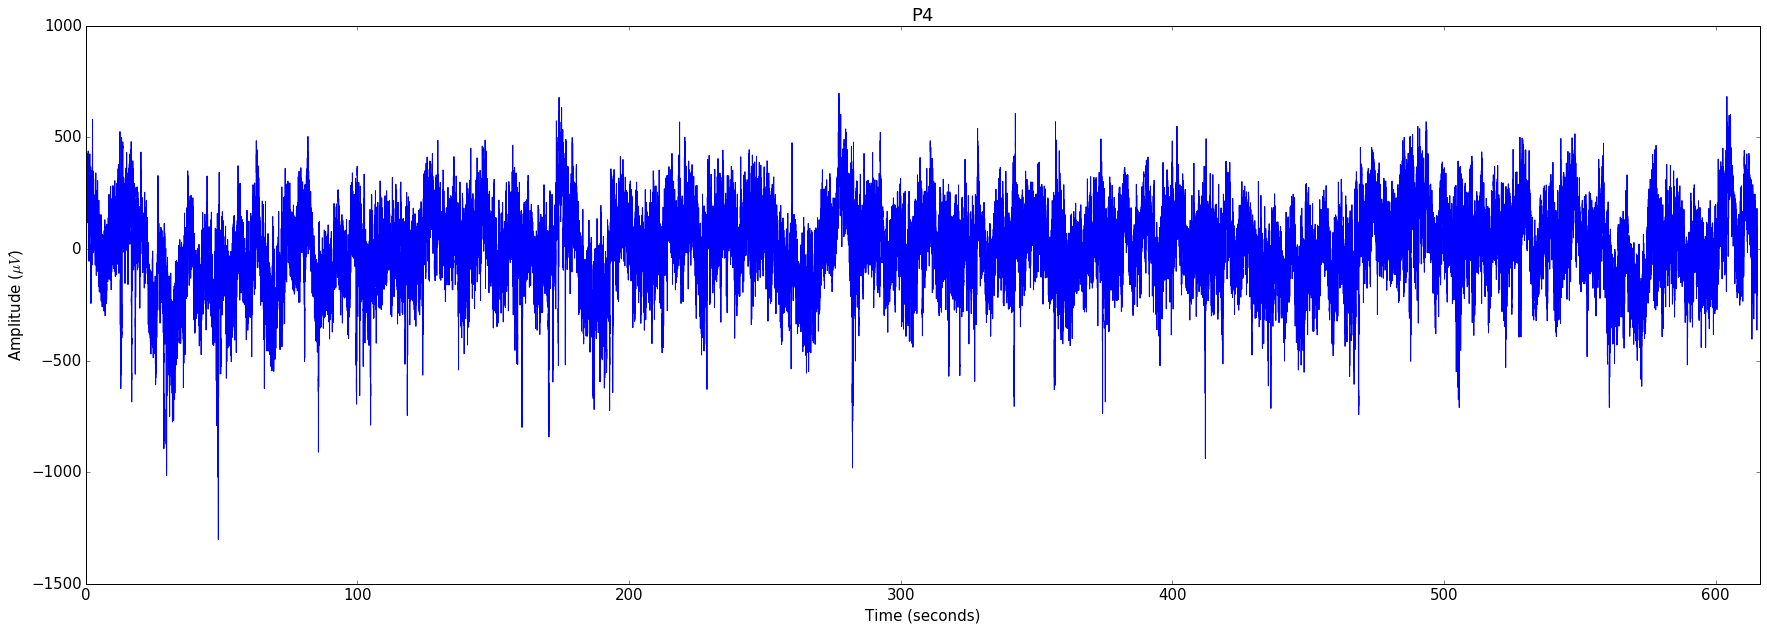

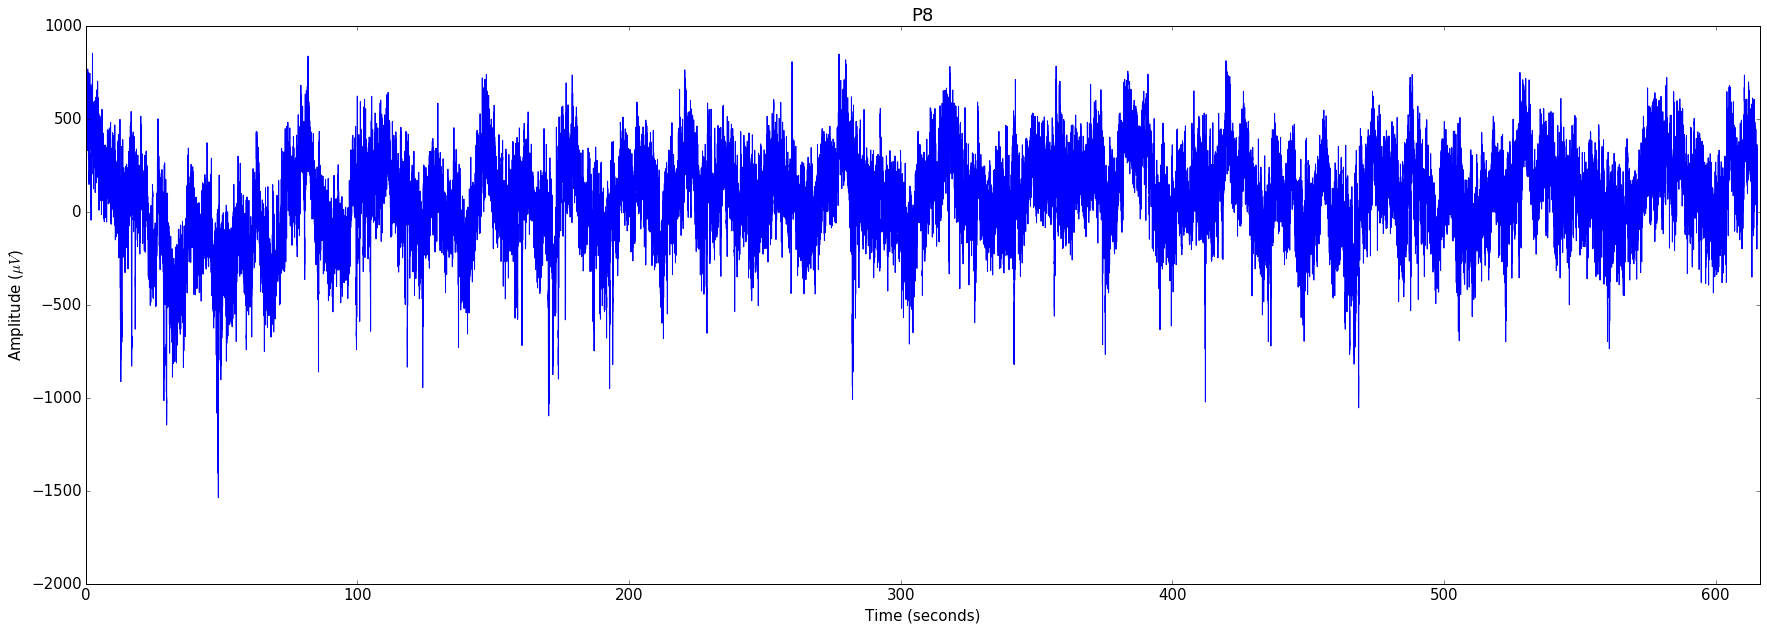

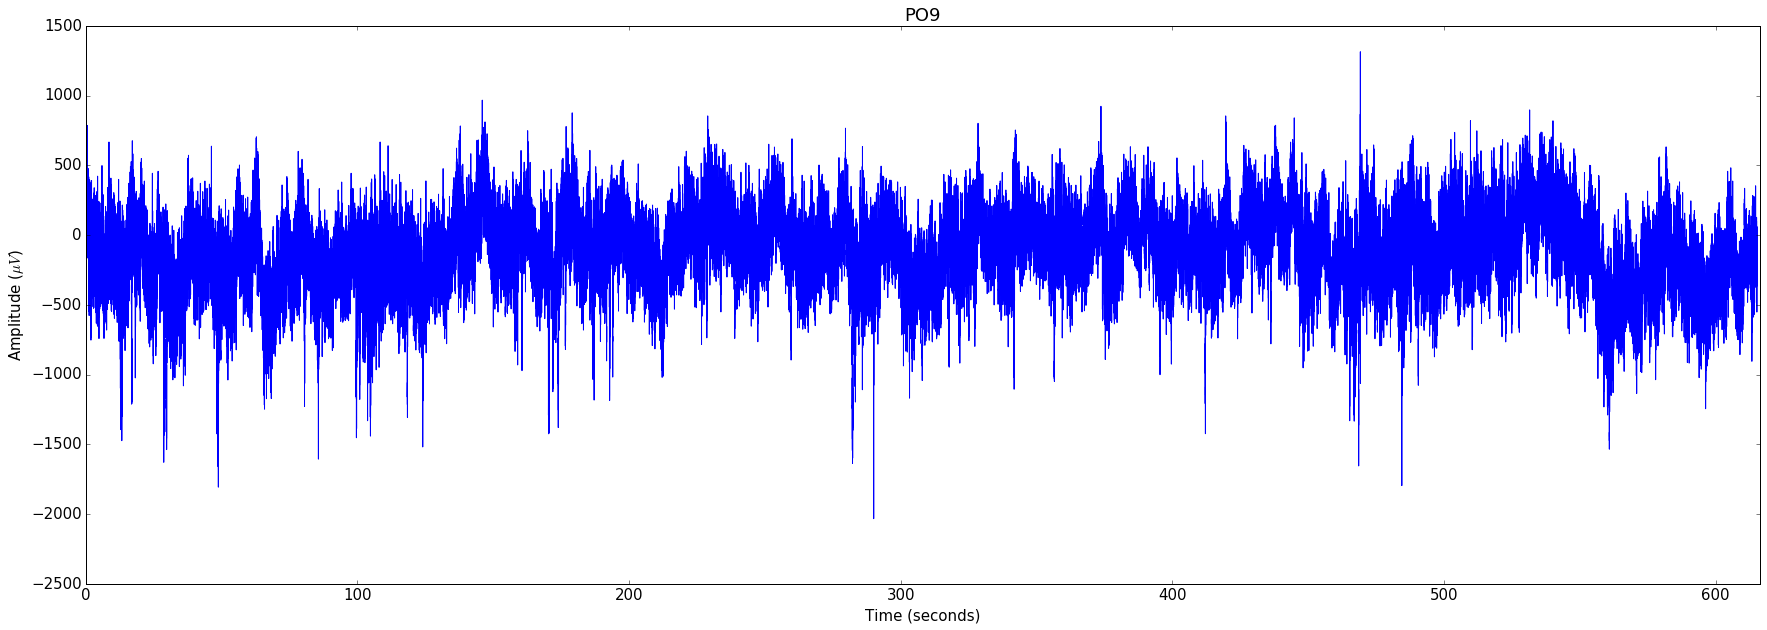

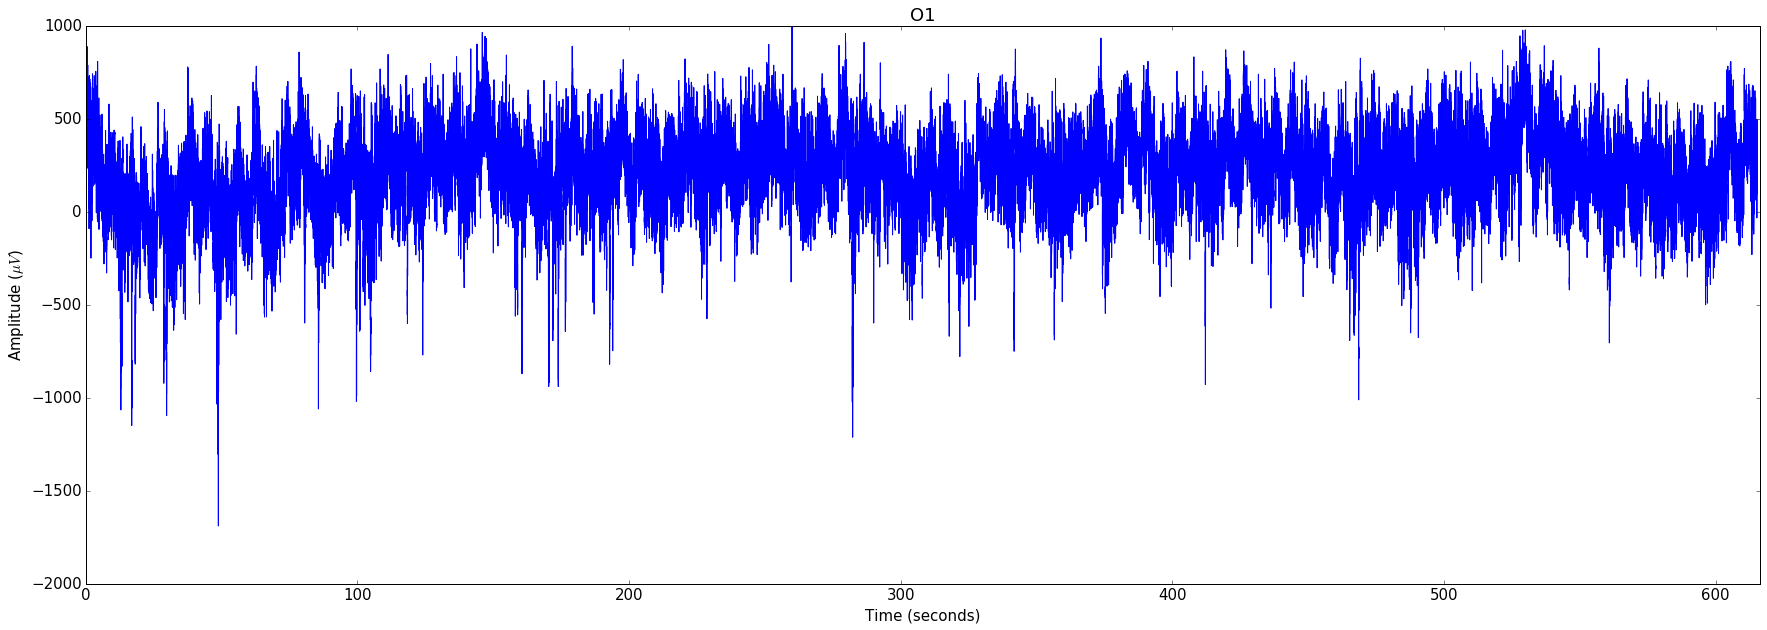

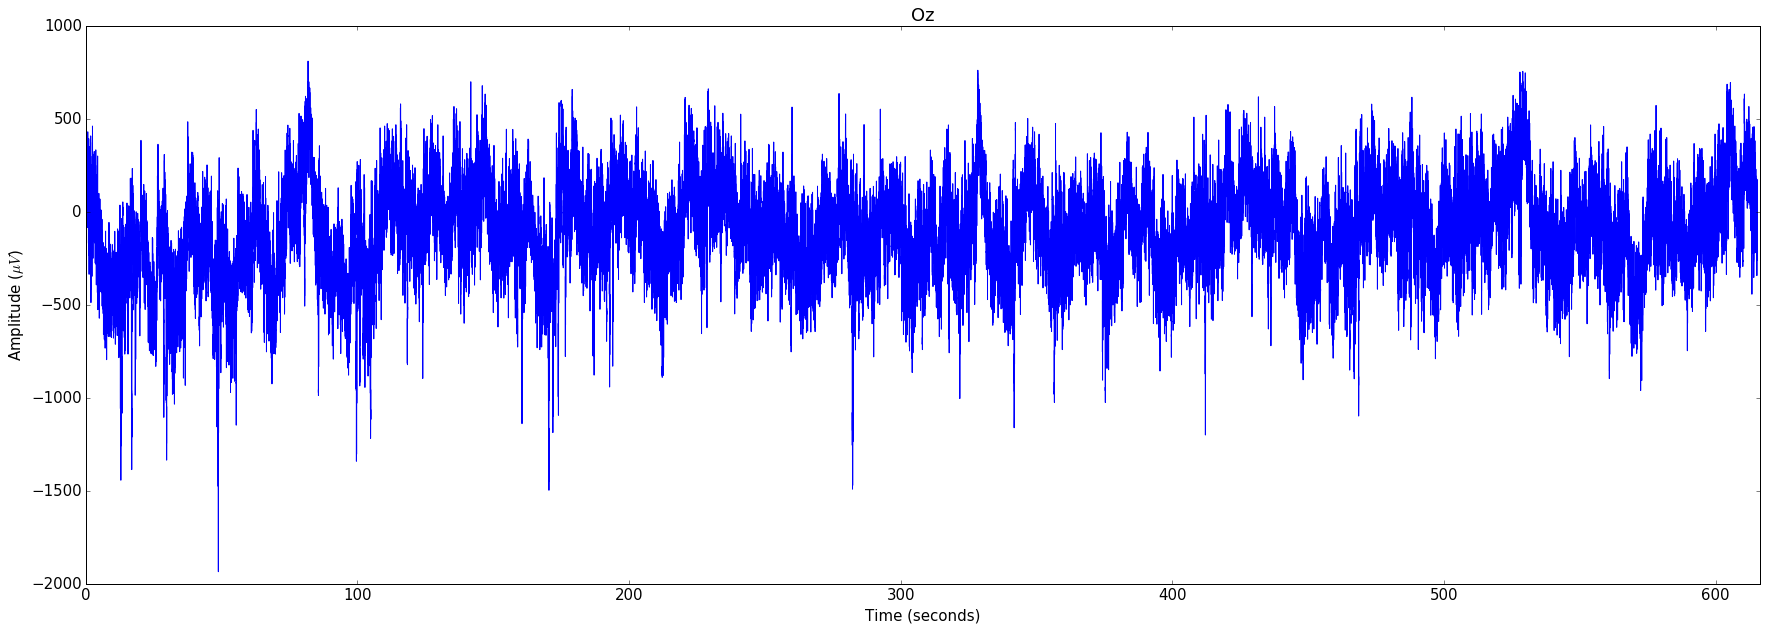

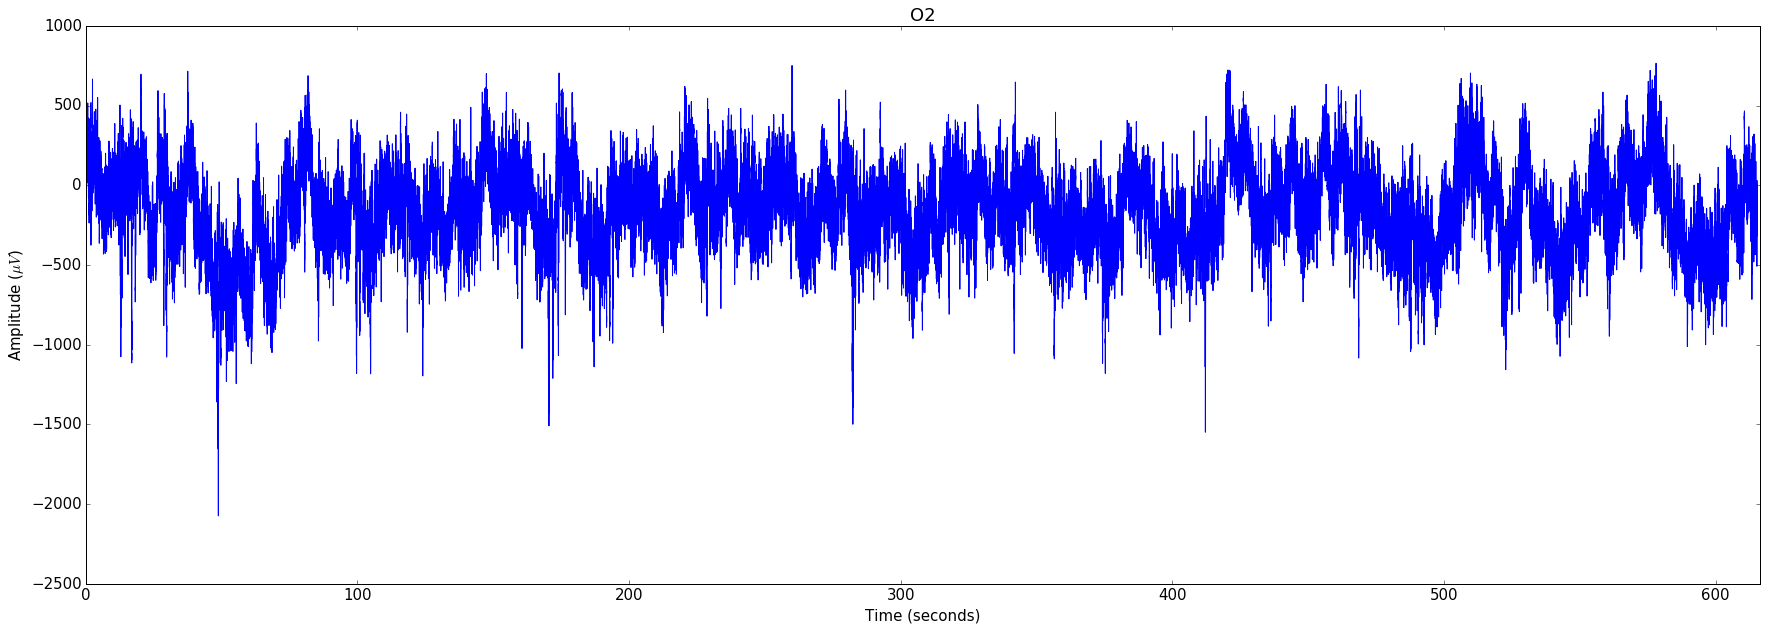

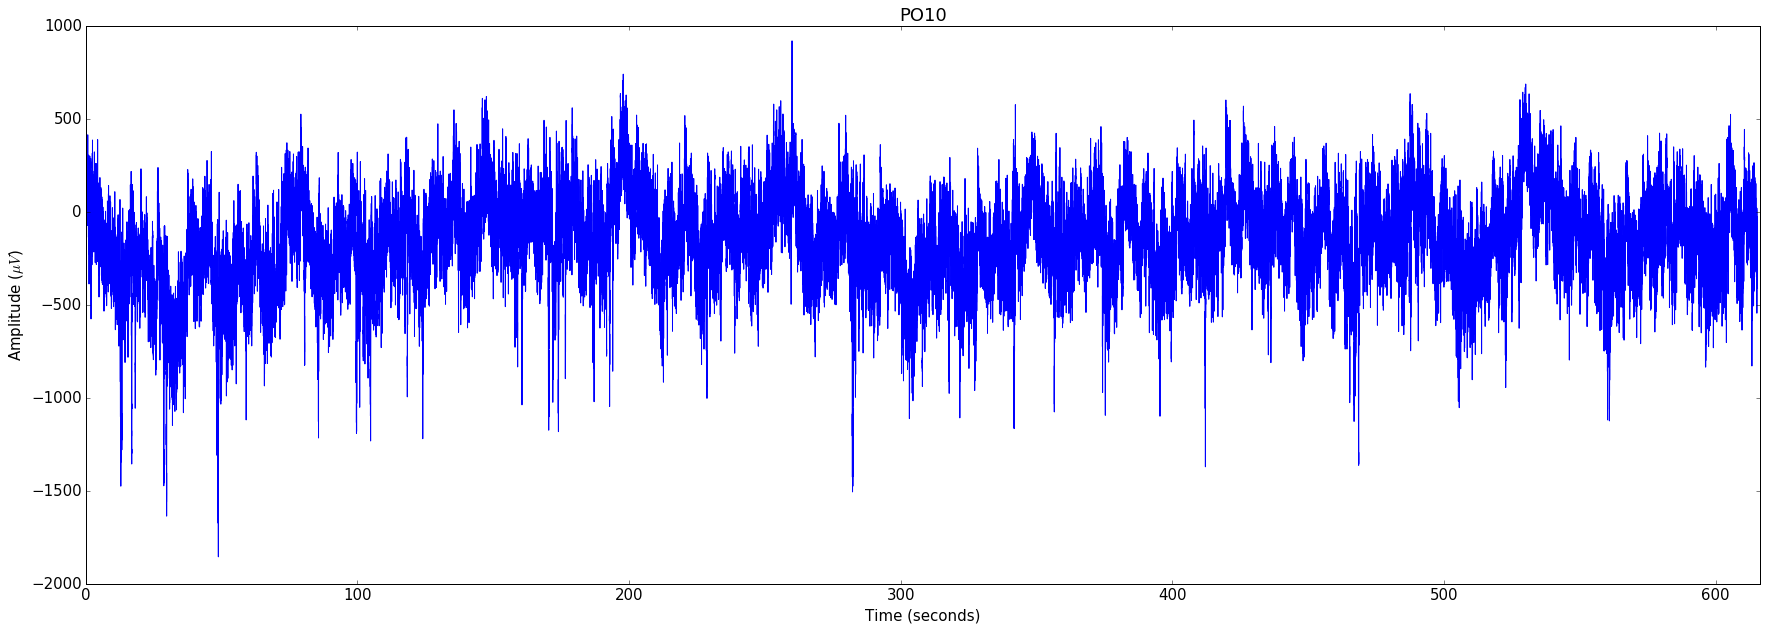

In [9]:
#let's look at the time series of all the plots
for col in series.columns:
    fig = plt.gcf()
    fig.set_size_inches((30, 10))
    #plt.plot(x_axis[:10000], series[col].values[:10000])
    plt.plot(x_axis, series[col].values)
    plt.xlabel('Time (seconds)')
    plt.ylabel(r'Amplitude ($\mu V$)')
    plt.xlim(0, x_axis[-1] + 1)
    #plt.xlim(0)
    plt.title(col)
    plt.show()
    plt.close()


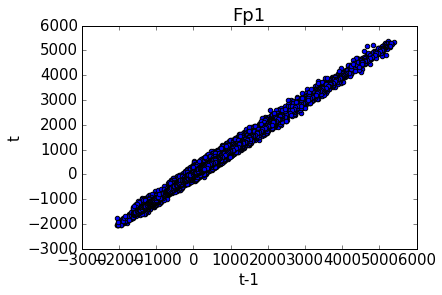

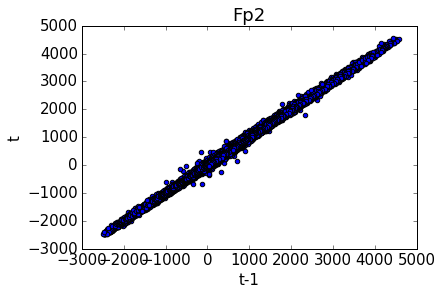

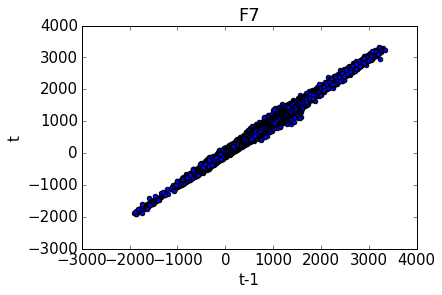

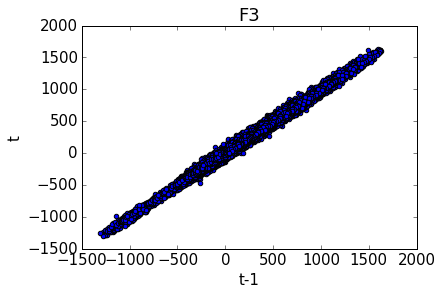

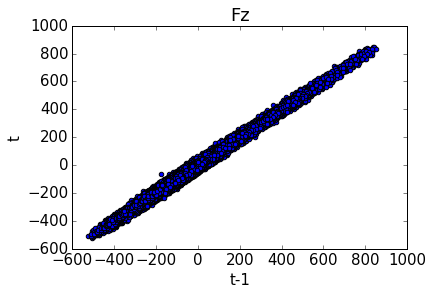

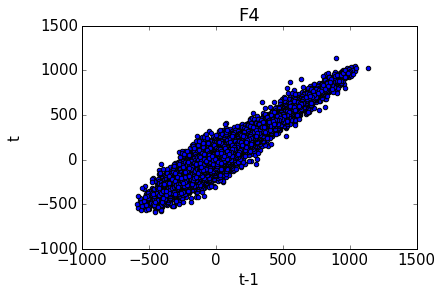

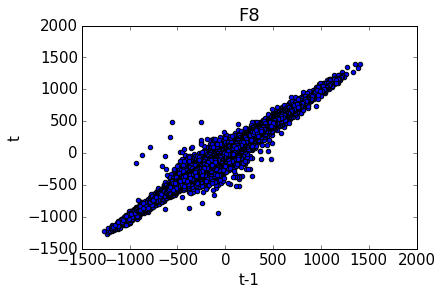

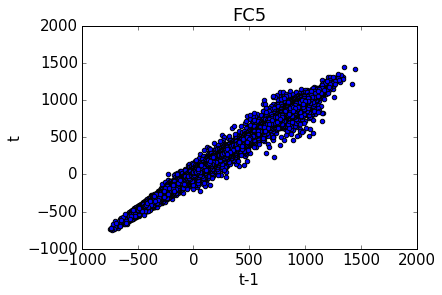

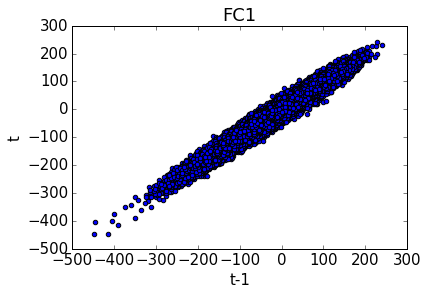

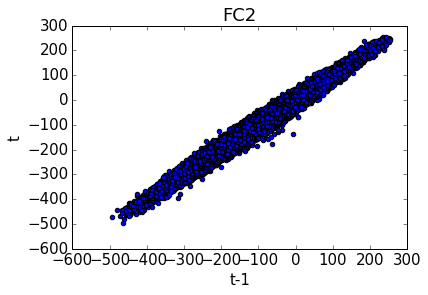

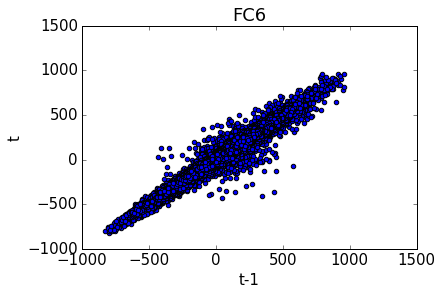

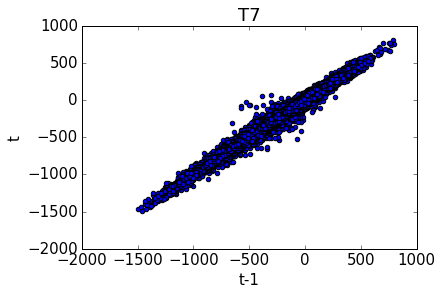

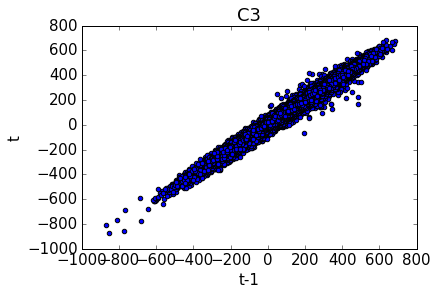

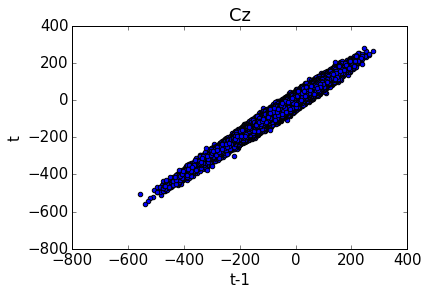

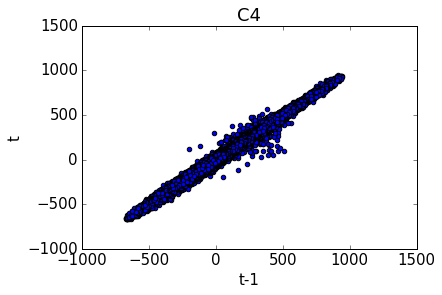

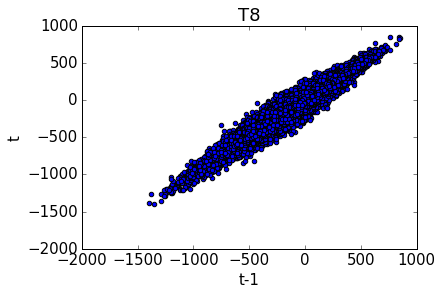

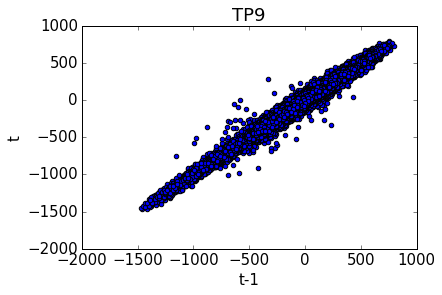

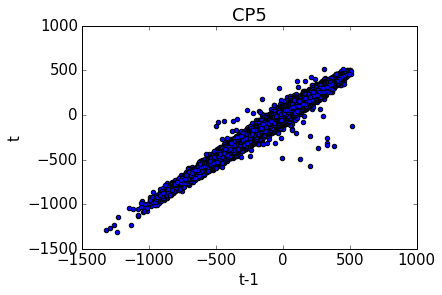

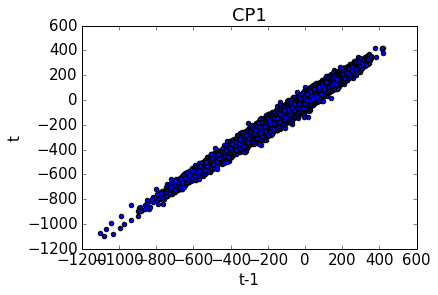

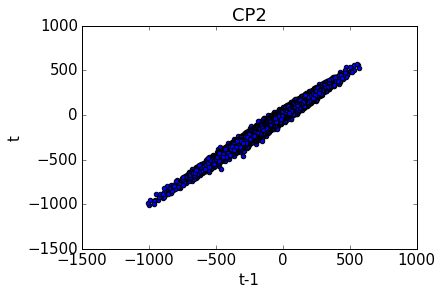

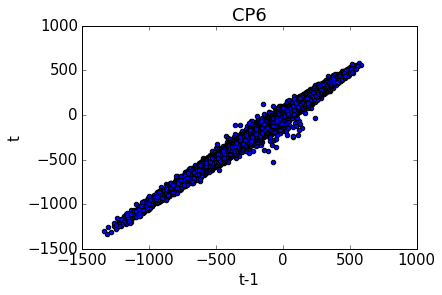

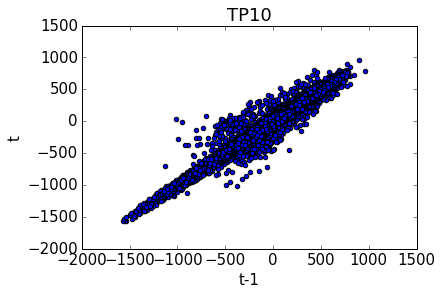

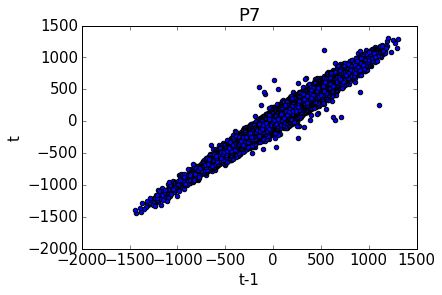

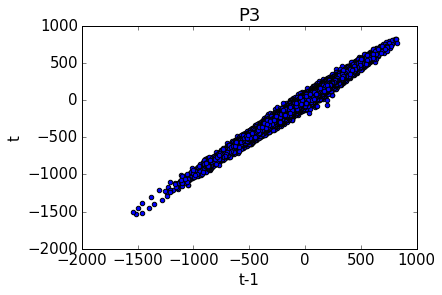

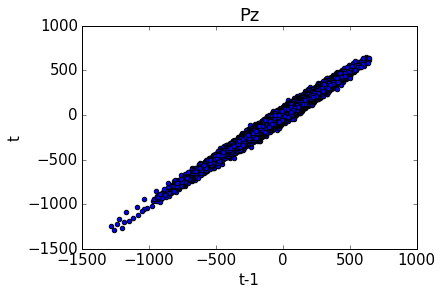

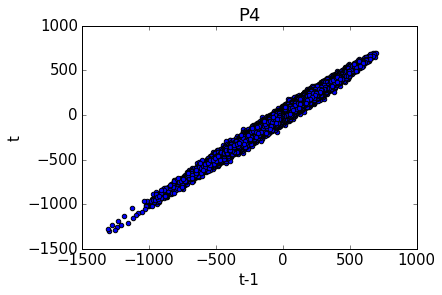

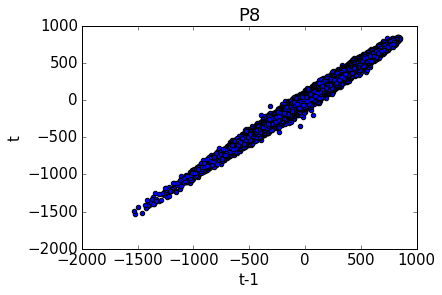

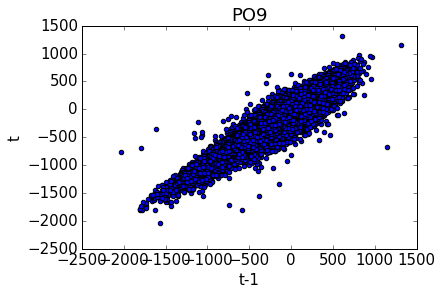

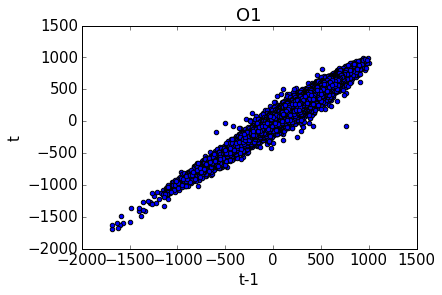

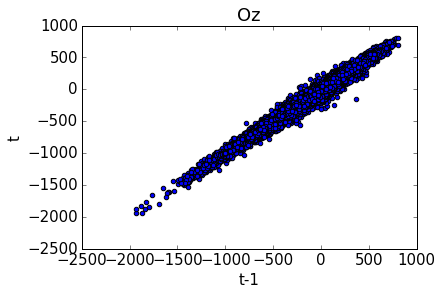

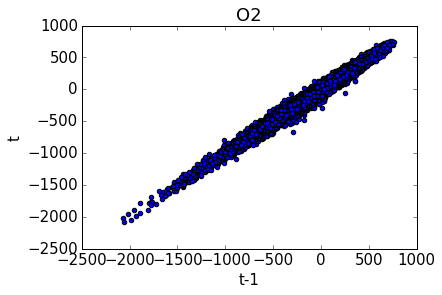

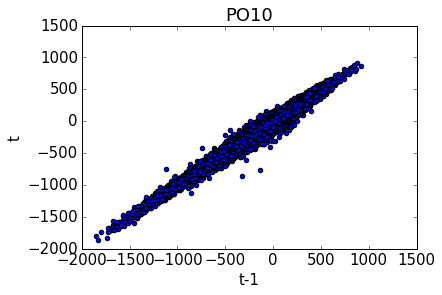

In [10]:
# autocorrelation plots
for col in series.columns:
    col_values = series[col].values
    plt.scatter(col_values[:-1], col_values[1:])
    plt.xlabel('t-1')
    plt.ylabel(r't')
    plt.title(col)
    plt.show()
    plt.close()

In [11]:
for i in range(series.shape[1]):
    print (np.corrcoef(series.values[1:, i], series.values[:-1, i])[0, 1])

0.998018713073
0.998270210772
0.997430718117
0.996378899792
0.9931828272
0.978999058997
0.993200298212
0.994474857676
0.979319409872
0.984823324986
0.990626942847
0.992076064647
0.991804923312
0.983538126111
0.993877729999
0.975762709374
0.988696739853
0.987646503703
0.986061773444
0.99186795401
0.992102709493
0.987196283869
0.986284534585
0.989438468705
0.990280097739
0.990044842482
0.991633180687
0.939689155983
0.975705755358
0.987563392401
0.990559966968
0.988139178047


In [12]:
covariance = np.cov(series.values.T)
corr = np.corrcoef(series.values.T)


for i in list(corr):
    print(i)

[ 1.          0.90945006  0.74522896  0.61053163  0.64328324  0.51824182
  0.28860311  0.23625041  0.27817089  0.03054704  0.19011077 -0.04221058
  0.03489677 -0.379159    0.09030083 -0.13432265 -0.33119957 -0.14270737
 -0.3086956  -0.29760393 -0.15480806 -0.22390549 -0.12094368 -0.30940127
 -0.26877386 -0.11269184 -0.10476608 -0.14419646 -0.22695398 -0.1158241
 -0.22348232 -0.16637421]
[ 0.90945006  1.          0.65442124  0.48776411  0.60092578  0.53869403
  0.39479557  0.16278112  0.20690429  0.09340926  0.28432896 -0.06300584
 -0.02868489 -0.35307652  0.14139825 -0.03774761 -0.24239977 -0.14785252
 -0.31990683 -0.23556325 -0.08685179 -0.13349188 -0.11644146 -0.32291458
 -0.26125557 -0.06818332 -0.03334058 -0.13271876 -0.18077183 -0.05864566
 -0.23786783 -0.09266227]
[ 0.74522896  0.65442124  1.          0.60203535  0.47527272  0.31413552
  0.22109411  0.56537833  0.45802968  0.03324408  0.14840277  0.36344583
  0.25612156 -0.19318481  0.1439197  -0.01685421  0.01468826  0.21538513


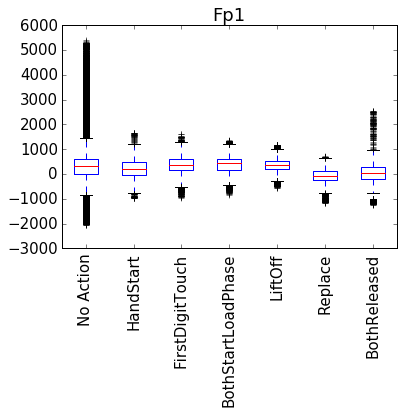

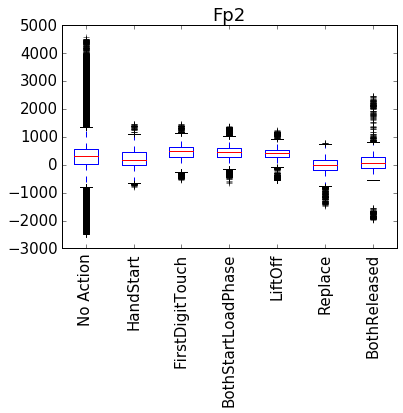

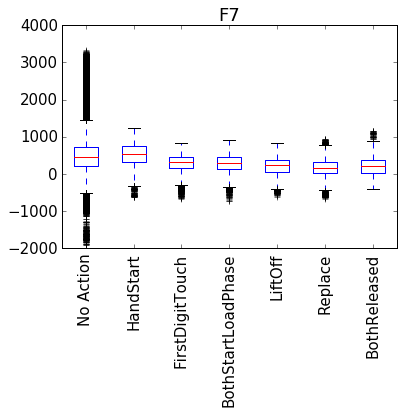

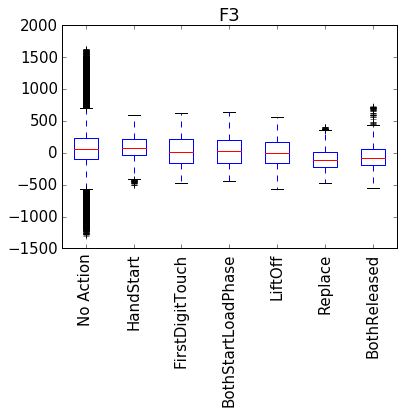

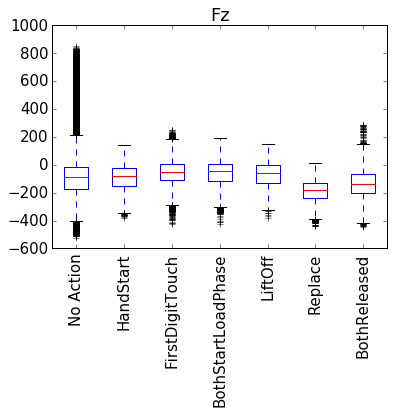

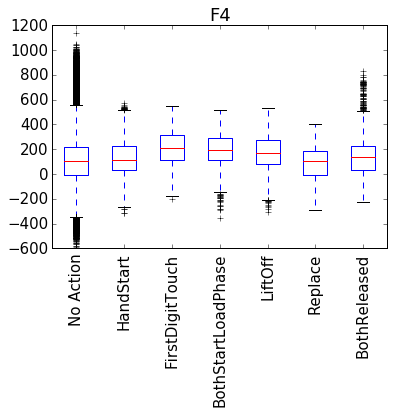

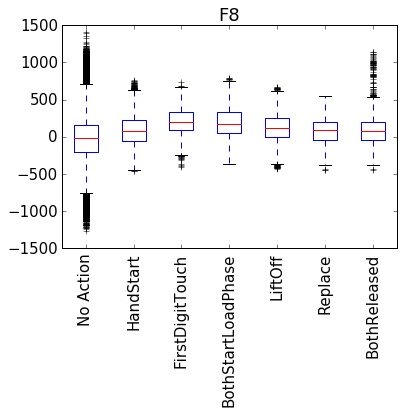

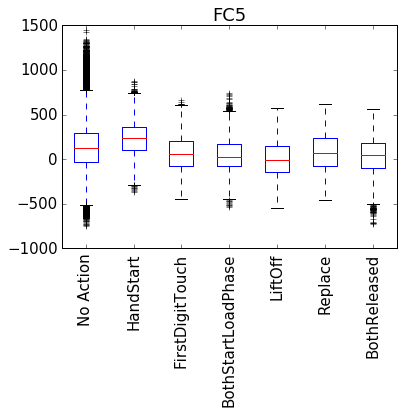

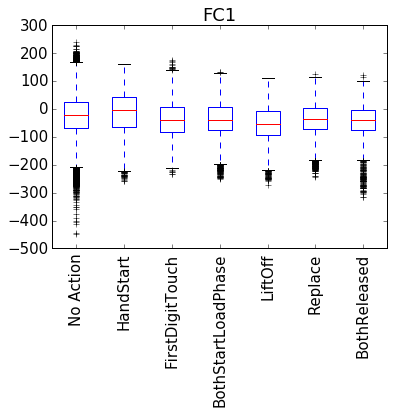

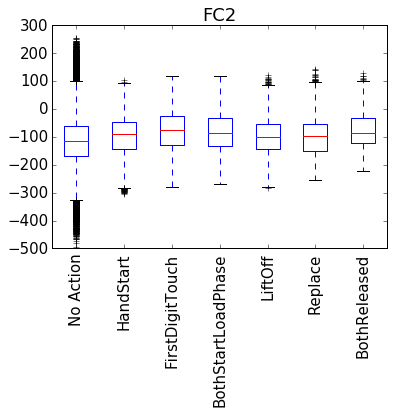

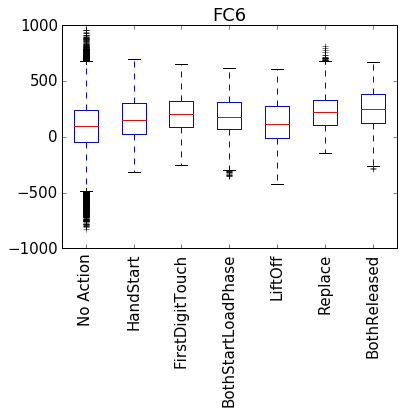

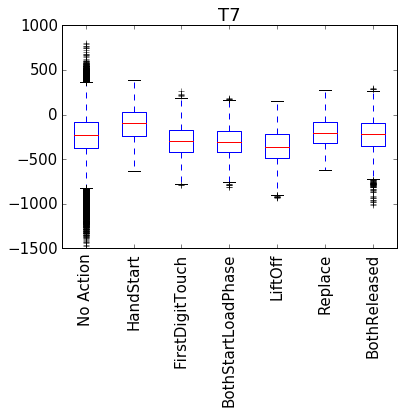

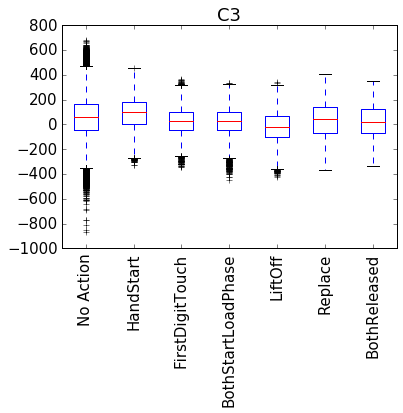

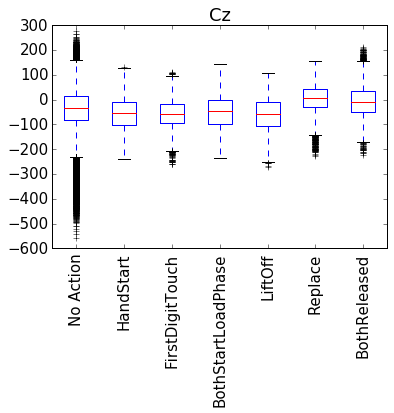

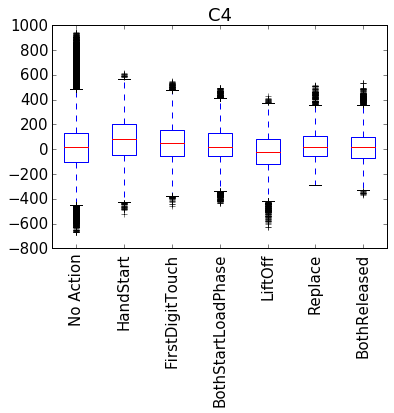

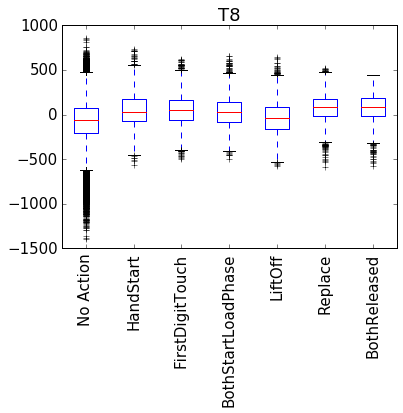

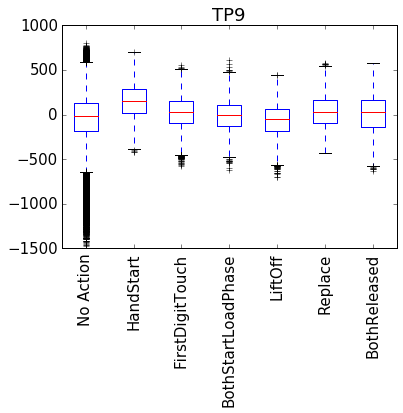

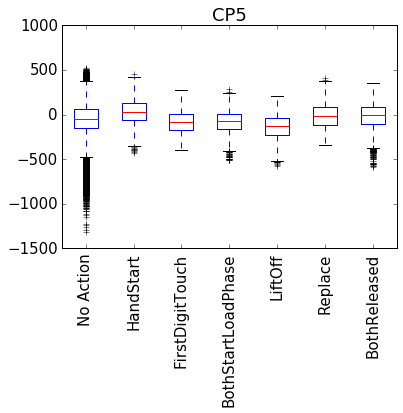

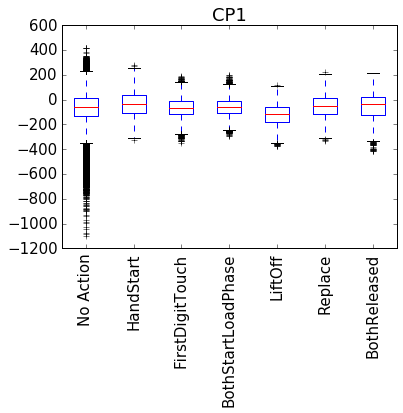

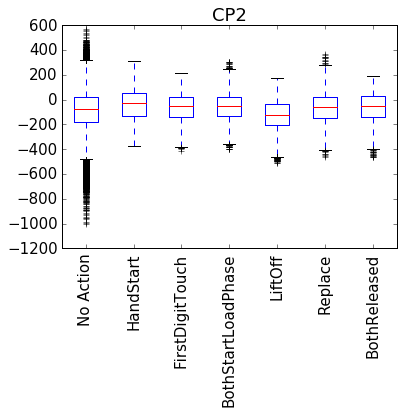

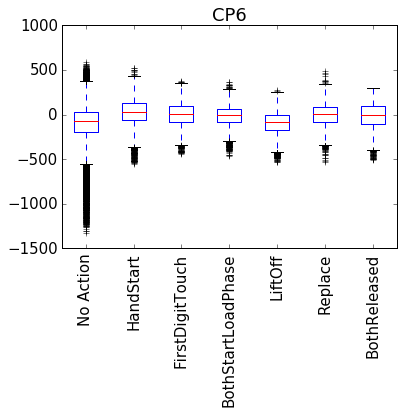

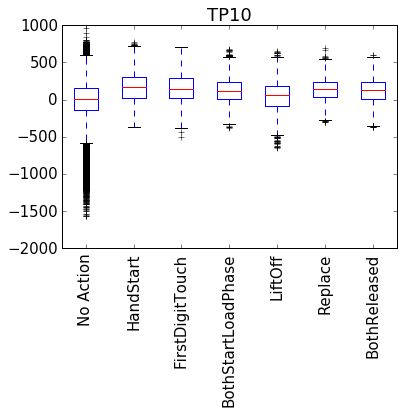

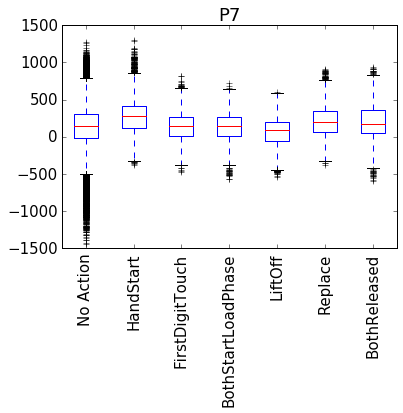

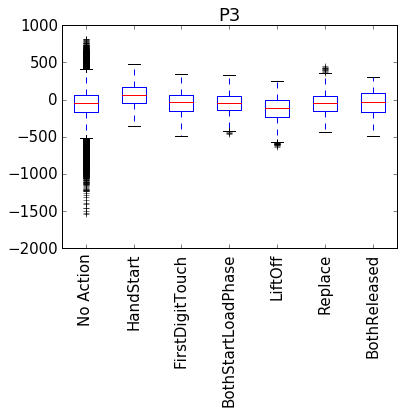

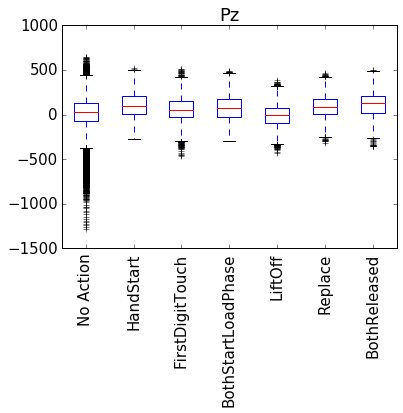

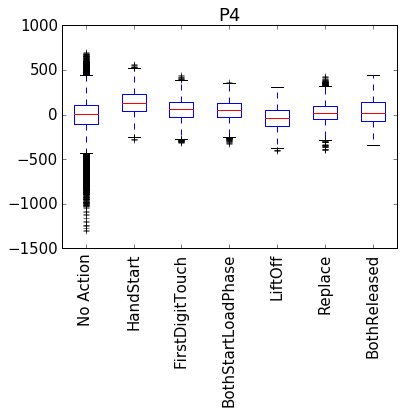

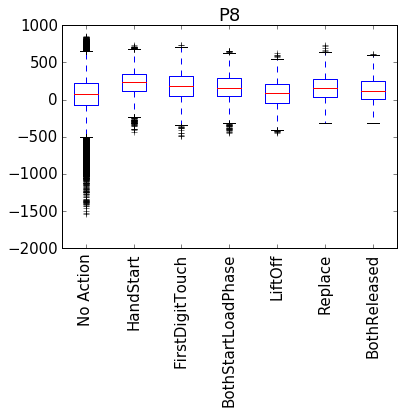

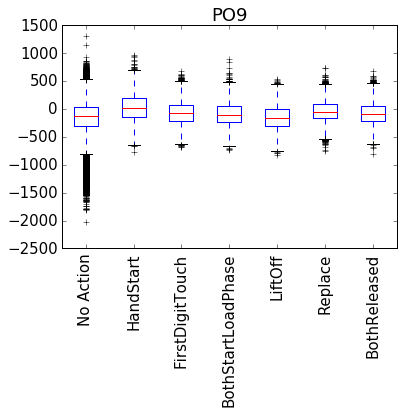

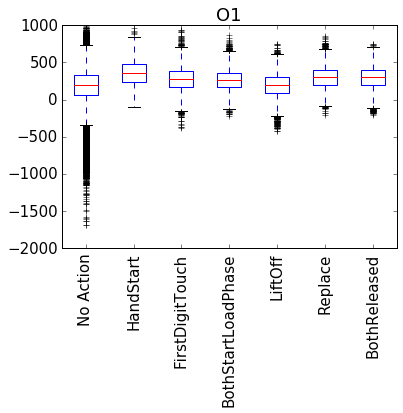

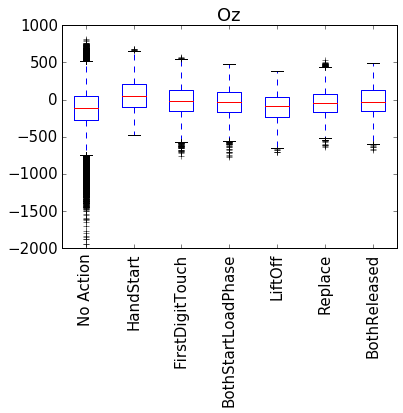

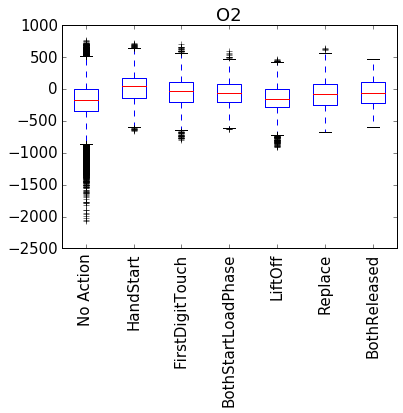

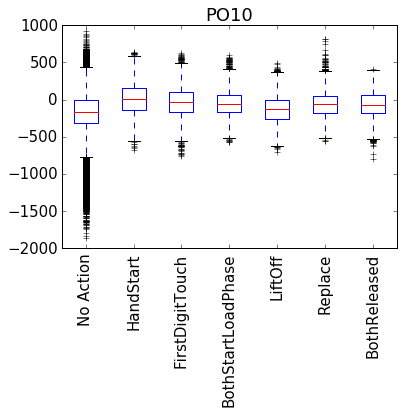

In [13]:
# distribution of the columns in the data split by features
num_classes = 7 # 6 activities plus no activity

for feature in series.columns:
    feature_by_label = []
    for i in range(num_classes):
        # for each class label, get the rows where the class happened
        indexes = np.where(labels == i)[0]
        feature_by_label.append(series[feature].values[indexes])
    plt.boxplot(feature_by_label)
    plt.title(feature)
    plt.xticks(locations[1:], names[:-1], rotation='vertical')
    plt.show()
    plt.close()

In [14]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X = series.values
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
# lr.predict_proba gives a probability for each class
y_prob = lr.predict_proba(X)
y_prob



array([[  9.32565235e-01,   6.67272099e-02,   2.72950452e-06, ...,
          4.28729735e-06,   6.54680303e-04,   4.38239641e-05],
       [  9.26807474e-01,   7.28823498e-02,   1.55594453e-06, ...,
          3.18259325e-06,   2.75795137e-04,   2.80791017e-05],
       [  9.02505009e-01,   9.71045849e-02,   1.44194260e-06, ...,
          3.45146412e-06,   3.53244140e-04,   3.08007791e-05],
       ..., 
       [  9.21704994e-01,   2.77376731e-04,   4.84939464e-05, ...,
          7.93923756e-04,   2.71902376e-02,   4.98528998e-02],
       [  9.22719676e-01,   3.82974399e-04,   3.27429829e-05, ...,
          7.18623503e-04,   2.85007826e-02,   4.75443840e-02],
       [  9.21645367e-01,   2.79723658e-04,   2.50532298e-05, ...,
          1.00143643e-03,   3.67687935e-02,   4.01936217e-02]])

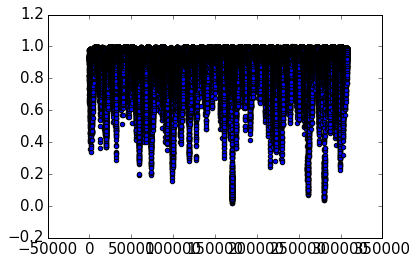

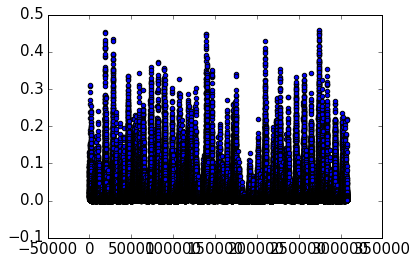

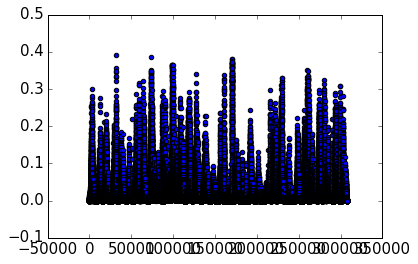

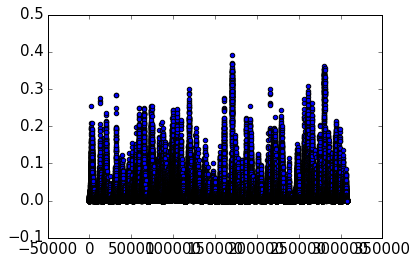

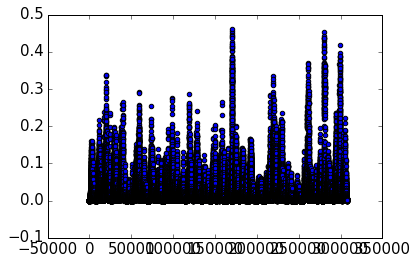

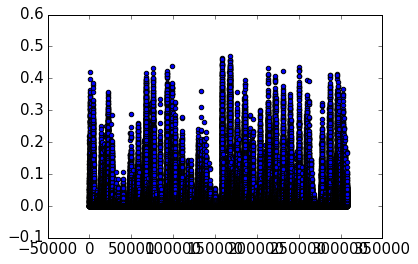

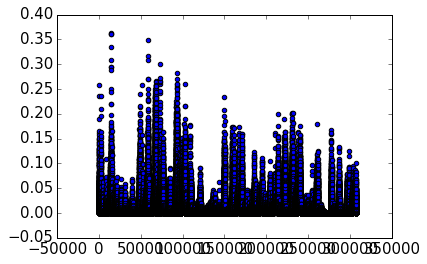

In [18]:
for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()
from sklearn.metrics import roc_auc_score 

In [19]:

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')


No Action: 0.819855887246
HandStart: 0.876257530236
FirstDigitTouch: 0.89745643987
BothStartLoadPhase: 0.889987738584
LiftOff: 0.883267751162
Replace: 0.938725244881
BothReleased: 0.898334469196


In [20]:
def extract_features(ts):
    """
    ts is the time series of labels as a numpy array
    """
    last_state = 0
    last_state_nz = 6
    time_since_last_nz = 2
    duration_of_cur_state = 1
    X = []
    for i in range(len(ts)):
        cur_state = ts[i]
        X.append([last_state, last_state_nz, time_since_last_nz, duration_of_cur_state])
        
        if last_state == cur_state:
            duration_of_cur_state += 1
        else:
            duration_of_cur_state = 0
        if cur_state != 0:
            last_state_nz = cur_state
            time_since_last_nz = 1
        else:
            time_since_last_nz += 1
        last_state = cur_state
    X = np.array(X)
    return X

X = extract_features(labels)

lr = LogisticRegression()
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

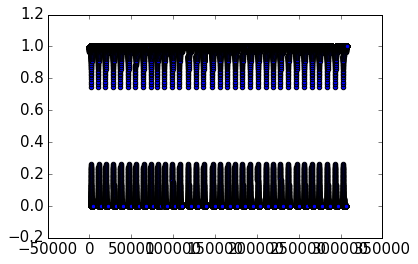

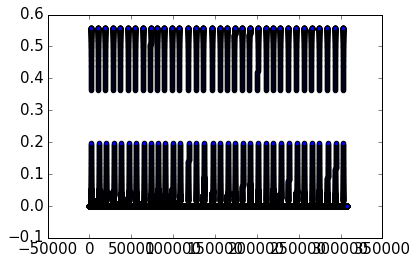

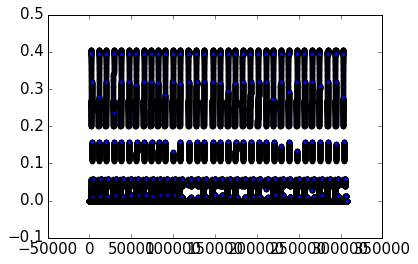

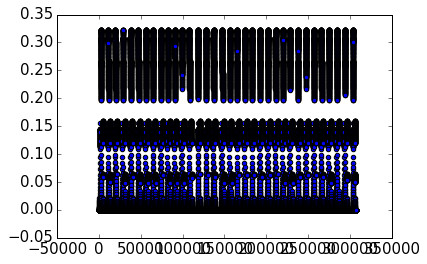

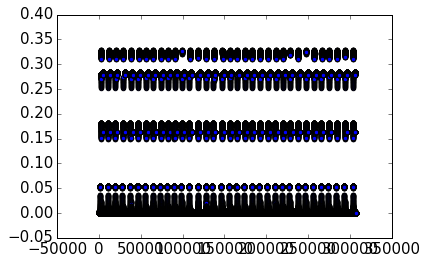

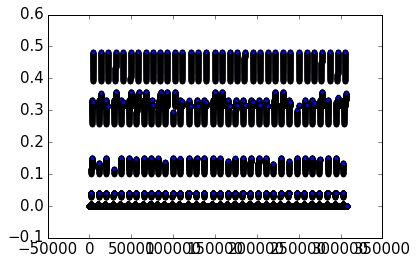

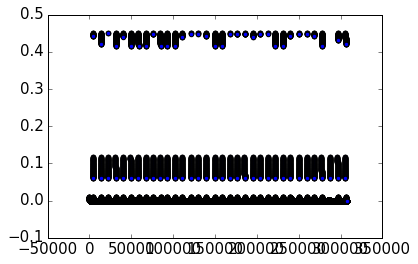

In [21]:
y_prob = lr.predict_proba(X)

for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()

In [22]:
from sklearn.metrics import roc_auc_score

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')

No Action: 0.99872226273
HandStart: 0.996174894997
FirstDigitTouch: 0.998686907987
BothStartLoadPhase: 0.994670233406
LiftOff: 0.999308071264
Replace: 0.998693185398
BothReleased: 0.999483069368


In [23]:
from sklearn.metrics import precision_recall_fscore_support
y_true = labels
y_pred = np.argmax(y_prob, axis=1)
prec, rec, fscore, supp = precision_recall_fscore_support(y_true, y_pred)
print ("Precision:", ["%.3f" % i for i in prec])
print ("Recall:", ["%.3f" % i for i in rec])
print ("F-1 Score:", ["%.3f" % i for i in fscore])


Precision: ['0.999', '0.993', '0.785', '0.978', '0.999', '0.818', '0.987']
Recall: ['0.999', '0.993', '0.980', '0.706', '0.775', '0.993', '0.987']
F-1 Score: ['0.999', '0.993', '0.872', '0.820', '0.873', '0.897', '0.987']
